#Итоговая работа на тему:
#"Разработка модели машинного обучения для прогнозирования стоимости жилой недвижимости в городе Мельбурн (Австралия)"

##О наборе данных:
#Melbourne Housing Snapshot
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data

Обзор состояния рынка жилья в Мельбурне (Австралия).

Этот датасет был взят из общедоступных результатов, публикуемых каждую неделю с сайта Domain.com.au. Набор данных включает адрес, тип недвижимости, район города, способ продажи, количество комнат, цену, агента по недвижимости, дату продажи и расстояние от центрального делового района.

Задача: разработать модель машинного обучения, которая поможет прогнозировать стоимость недвижимости на основе предоставленных параметров.

---


**Описание набора данных:**

- **Suburb** - Района Мельбурна
- **Address** - Адрес объекта
- **Rooms** - Количество комнат
- **Type** - Тип жилья:

    br - квартира;

    h - дом, коттедж, вилла, полуподвальное помещение, терраса;

    u - одиночный, дуплекс;

    t - таунхаус;

    dev site - участок под застройку;

    o res - другое жилое помещение.

- **Price** - Цена (в долларах)
- **Method** - способ продажи:

    S - проданное имущество;

    SP - продано до ввода в эксплуатацию;

    PI - переданное в собственность имущество;

    PN - проданное до ввода в эксплуатацию, без разглашения;

    SN - проданное имущество, без разглашения;

    NB - не участвует в аукицоне;

    VB - участвует в аукционе;

    W - отозвано до проведения аукциона;

    SA - продано после аукциона;

    SS - продано после аукциона, цена не разглашается;

    NA - цена или максимальная ставка недоступны.

- **SellerG** - Риэлтор
- **Date** - Дата продажи
- **Distance** - Расстояние до центрального делового района (в километрах)
- **Postcode** - Почтовый индекс
- **Bedroom** - Количество спален
- **Bathroom** - Количество ванных комнат
- **Car** - Количество парковочных мест
- **Landsize** - Площадь земельного участка (в квадратных метрах)
- **BuildindArea** - Площадь здания (в квадратных метрах)
- **YearBuilt** - Год постройки
- **Bathroom** - Количество ванных комнат
- **CouncilArea** - Руководящий совет по данному району
- **Lattitude** - Геопозиция, широта
- **Longitude** - Геопозиция, долгота
- **RegionName** - Географическое расположение (Запад, Северо-Запад, Восток, Северо-восток и т.д.)
- **Propertycount** - Количество объектов недвижимости в данном районе

# Шаг 1: Загрузка данных:

Загружаем данные из файла 'MEL_CONCAT.csv'

In [ ]:
# Подключение google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Загрузка и чтение датасета с google drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/attestation 4/MEL_CONCAT.csv', sep=',')
df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Footscray,10/30 Pickett St,1,u,170000,PI,Burnham,1/07/2017,5.1,...,1,0.0,30.0,26.000000,2013.0,Maribyrnong,-37.80141,144.89587,Western Metropolitan,7570
1,1,Caulfield,30 Pyne St,4,h,131000,PI,Rodney,25/02/2017,8.9,...,1,2.0,499.0,155.000000,1920.0,Glen Eira,-37.88640,145.02420,Southern Metropolitan,2379
2,2,Coburg,171 Moreland Rd,4,h,145000,PI,Jellis,4/06/2016,7.8,...,1,1.0,536.0,164.000000,1910.0,Moreland,-37.75550,144.96580,Northern Metropolitan,11204
3,3,Albion,10/117 Anderson Rd,1,u,185000,S,hockingstuart,22/08/2016,13.9,...,1,1.0,2347.0,43.000000,1975.0,Brimbank,-37.78520,144.82720,Western Metropolitan,2185
4,4,Albion,8/6 Ridley St,1,u,145000,PI,Biggin,28/05/2016,13.9,...,1,1.0,36.0,38.416667,NaN,Brimbank,-37.78330,144.82660,Western Metropolitan,2185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,13575,Toorak,17 Albany Rd,3,h,6250000,S,Kay,15/10/2016,4.6,...,3,2.0,564.0,342.000000,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217
13576,13576,Canterbury,49 Mangarra Rd,5,h,8000000,VB,Sotheby's,13/05/2017,9.0,...,5,4.0,2079.0,464.300000,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265
13577,13577,Hawthorn,49 Lisson Gr,4,h,7650000,S,Abercromby's,17/06/2017,5.3,...,2,4.0,1690.0,284.000000,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308
13578,13578,Middle Park,136 Page St,5,h,6400000,S,Marshall,9/09/2017,3.0,...,2,1.0,553.0,308.000000,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019


# Шаг 2: Разведочный анализ данных

Проведем разведочный анализ данных, чтобы понять их структуру и основные характеристики.

In [ ]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Footscray,10/30 Pickett St,1,u,170000,PI,Burnham,1/07/2017,5.1,...,1,0.0,30.0,26.000000,2013.0,Maribyrnong,-37.80141,144.89587,Western Metropolitan,7570
1,1,Caulfield,30 Pyne St,4,h,131000,PI,Rodney,25/02/2017,8.9,...,1,2.0,499.0,155.000000,1920.0,Glen Eira,-37.88640,145.02420,Southern Metropolitan,2379
2,2,Coburg,171 Moreland Rd,4,h,145000,PI,Jellis,4/06/2016,7.8,...,1,1.0,536.0,164.000000,1910.0,Moreland,-37.75550,144.96580,Northern Metropolitan,11204
3,3,Albion,10/117 Anderson Rd,1,u,185000,S,hockingstuart,22/08/2016,13.9,...,1,1.0,2347.0,43.000000,1975.0,Brimbank,-37.78520,144.82720,Western Metropolitan,2185
4,4,Albion,8/6 Ridley St,1,u,145000,PI,Biggin,28/05/2016,13.9,...,1,1.0,36.0,38.416667,NaN,Brimbank,-37.78330,144.82660,Western Metropolitan,2185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13580 non-null  int64  
 1   Suburb         13580 non-null  object 
 2   Address        13580 non-null  object 
 3   Rooms          13580 non-null  int64  
 4   Type           13580 non-null  object 
 5   Price          13580 non-null  int64  
 6   Method         13580 non-null  object 
 7   SellerG        13580 non-null  object 
 8   Date           13580 non-null  object 
 9   Distance       13580 non-null  float64
 10  Postcode       13580 non-null  int64  
 11  Bedroom2       13580 non-null  int64  
 12  Bathroom       13580 non-null  int64  
 13  Car            13518 non-null  float64
 14  Landsize       13580 non-null  float64
 15  BuildingArea   13580 non-null  float64
 16  YearBuilt      8205 non-null   float64
 17  CouncilArea    12211 non-null  object 
 18  Lattit

In [ ]:
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,13580.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,6789.500000,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,545.740683,117.828995,1964.684217,-37.809203,144.995216,7454.417378
std,3920.352663,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,672.921270,394.038800,37.273762,0.079260,0.103916,4378.581772
min,0.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1196.000000,-38.182550,144.431810,249.000000
25%,3394.750000,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,304.750000,69.120952,1940.000000,-37.856822,144.929600,4380.000000
50%,6789.500000,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,473.536419,99.368383,1970.000000,-37.802355,145.000100,6555.000000
75%,10184.250000,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,133.000000,1999.000000,-37.756400,145.058305,10331.000000
max,13579.000000,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,38490.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


###Разведочный анализ данных по заданию:

In [ ]:
# a. Количество строк и столбцов в дата фрейме
print(f"Количество строк в датафрейме: {df.shape[0]}")
print(f"Количество столбцов в датафрейме: {df.shape[1]}")

Количество строк в датафрейме: 13580
Количество столбцов в датафрейме: 22


In [ ]:
# b. Объем оперативной памяти, занимаемый дата фреймом
print('Память, занимаемая дата фреймом:', round(df.memory_usage(deep=True).sum() / 1024 / 1024,2), 'MB')

Память, занимаемая дата фреймом: 8.24 MB


In [ ]:
# c. Для числовых переменных: описательная статистика (минимум, медиана, среднее, максимум, перцентили 25%, 50%, 75%)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,13580.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,6789.500000,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,545.740683,117.828995,1964.684217,-37.809203,144.995216,7454.417378
std,3920.352663,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,672.921270,394.038800,37.273762,0.079260,0.103916,4378.581772
min,0.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1196.000000,-38.182550,144.431810,249.000000
25%,3394.750000,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,304.750000,69.120952,1940.000000,-37.856822,144.929600,4380.000000
50%,6789.500000,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,473.536419,99.368383,1970.000000,-37.802355,145.000100,6555.000000
75%,10184.250000,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,133.000000,1999.000000,-37.756400,145.058305,10331.000000
max,13579.000000,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,38490.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
# d. Для категориальных переменных: расчет моды и ее повторяемости
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
for col in categorical_columns:
    mode = df[col].mode()[0]
    mode_count = df[col].value_counts()[mode]
    print(f"Столбец: {col}, Мода: {mode}, Количество: {mode_count}")

Столбец: Suburb, Мода: Reservoir, Количество: 359
Столбец: Address, Мода: 1/1 Clarendon St, Количество: 3
Столбец: Type, Мода: h, Количество: 9449
Столбец: Method, Мода: S, Количество: 9022
Столбец: SellerG, Мода: Nelson, Количество: 1565
Столбец: Date, Мода: 27/05/2017, Количество: 473
Столбец: CouncilArea, Мода: Moreland, Количество: 1163
Столбец: Regionname, Мода: Southern Metropolitan, Количество: 4695


In [ ]:
# e. Удаление столбца 'Unnamed'
df.drop(df.columns[df.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Footscray,10/30 Pickett St,1,u,170000,PI,Burnham,1/07/2017,5.1,3011,...,1,0.0,30.0,26.000000,2013.0,Maribyrnong,-37.80141,144.89587,Western Metropolitan,7570
1,Caulfield,30 Pyne St,4,h,131000,PI,Rodney,25/02/2017,8.9,3162,...,1,2.0,499.0,155.000000,1920.0,Glen Eira,-37.88640,145.02420,Southern Metropolitan,2379
2,Coburg,171 Moreland Rd,4,h,145000,PI,Jellis,4/06/2016,7.8,3058,...,1,1.0,536.0,164.000000,1910.0,Moreland,-37.75550,144.96580,Northern Metropolitan,11204
3,Albion,10/117 Anderson Rd,1,u,185000,S,hockingstuart,22/08/2016,13.9,3020,...,1,1.0,2347.0,43.000000,1975.0,Brimbank,-37.78520,144.82720,Western Metropolitan,2185
4,Albion,8/6 Ridley St,1,u,145000,PI,Biggin,28/05/2016,13.9,3020,...,1,1.0,36.0,38.416667,NaN,Brimbank,-37.78330,144.82660,Western Metropolitan,2185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Toorak,17 Albany Rd,3,h,6250000,S,Kay,15/10/2016,4.6,3142,...,3,2.0,564.0,342.000000,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217
13576,Canterbury,49 Mangarra Rd,5,h,8000000,VB,Sotheby's,13/05/2017,9.0,3126,...,5,4.0,2079.0,464.300000,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265
13577,Hawthorn,49 Lisson Gr,4,h,7650000,S,Abercromby's,17/06/2017,5.3,3122,...,2,4.0,1690.0,284.000000,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308
13578,Middle Park,136 Page St,5,h,6400000,S,Marshall,9/09/2017,3.0,3206,...,2,1.0,553.0,308.000000,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019


Поскольку в признаках 'Car', 'YearBuilt', 'CouncilArea' есть пропуски, заменим их средними значениями по каждому признаку

In [ ]:
# Замена пропусков средними значениями для числовых признаков
df[['Car', 'YearBuilt']] = df[['Car', 'YearBuilt']].fillna(df[['Car', 'YearBuilt']].mean())
# замена пропусков модой для категориального признака
df['CouncilArea'] = df['CouncilArea'].fillna('Moreland')
# Повторная проверка пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Анализ целевой переменной:

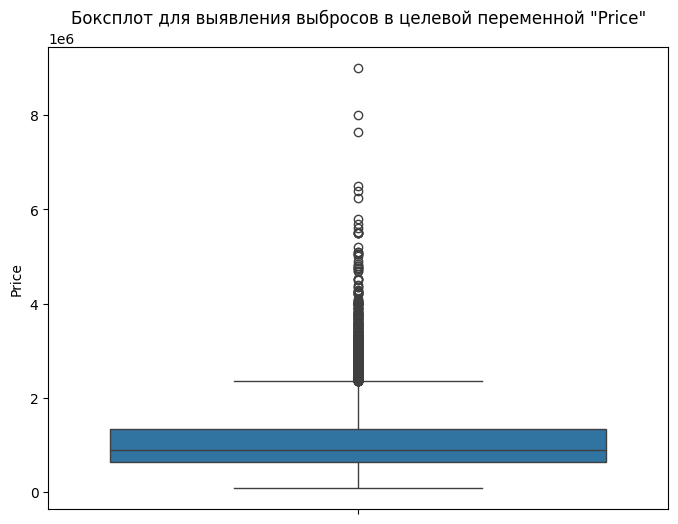

Количество выбросов целевой переменной: 612


In [ ]:
# Определение целевой переменной
target_column = 'Price'

# Построение боксплота для целевой переменной с seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=None, y=target_column, data=df)
plt.title('Боксплот для выявления выбросов в целевой переменной "{}"'.format(target_column))
plt.ylabel(target_column)
plt.show()

#  IQR для определения выбросов целевой переменной

Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

#  Количество выбросов целевой переменной
print('Количество выбросов целевой переменной:', df[target_column][(df[target_column] < lower_bound) | (df[target_column] > upper_bound)].count())

Как видно из данных боксплот, объекты недвижимости стоимостью более 2 млн долларов определяются, как выбросы.

Однако, проанализировав цены на недвижимость в Мельбурне в открытых источниках (https://www.properstar.ru/австралия/melburn/продажа/домов?sort=-price), можно сделать вывод, что цены, входящие в диапазон выбросов: от 2 до 9 млн долларов, являются рыночными и определяют стоимость жилья премиум-класса (особняки).

Анализ числовых переменных:

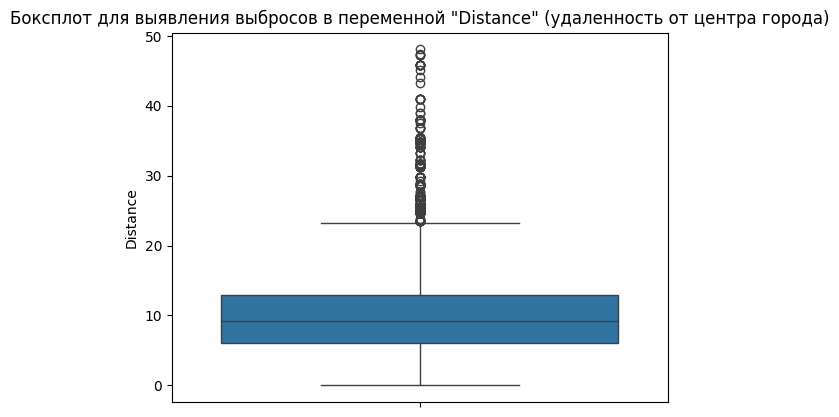

In [ ]:
#  Боксплот по числовой переменной Distance (удаленность от центра города):
sns.boxplot(x=None, y='Distance', data=df)
plt.title('Боксплот для выявления выбросов в переменной "Distance" (удаленность от центра города)'.format('Distance'))
plt.ylabel('Distance')
plt.show()

Как видно из боксплота переменной "Distance" (расстояние от центрального делового района Мельбурна до объекта недвижимости), существует выбросы в диапазоне от 20 до 48 км.
Однако, анализ адресов объектов недвижимости на карте города указывает на корректность данных об их удаленности от центра.

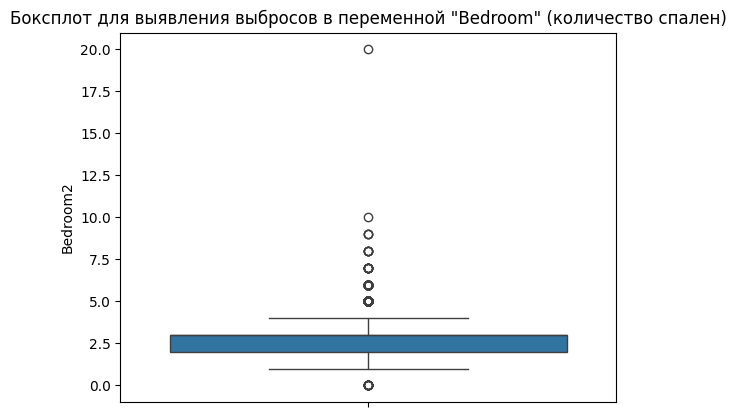

In [ ]:
#  Боксплот по числовой переменной Bedroom (количество спален):
sns.boxplot(x=None, y='Bedroom2', data=df)
plt.title('Боксплот для выявления выбросов в переменной "Bedroom" (количество спален)'.format('Bedroom2'))
plt.ylabel('Bedroom2')
plt.show()

Как видно из боксплота, переменная Bedroom содержит выбросы.
Определим, какие значения относятся к выбросам и их количество.

In [ ]:
#  IQR для определения выбросов переменной Bedroom

Q1 = df['Bedroom2'].quantile(0.25)
Q3 = df['Bedroom2'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

#  Количество выбросов переменной Bedroom
print('Верхняя граница диапазона:', upper_bound, '\nКоличество выбросов целевой переменной:', df[target_column][(df['Bedroom2'] < lower_bound) | (df['Bedroom2'] > upper_bound)].count())

Верхняя граница диапазона: 4.5 
Количество выбросов целевой переменной: 655


Принимая во внимание, что в состав выборки могут также входить гостевые дома с большим количеством спален, на данном этапе принято решение не корректировать значения выбросов.

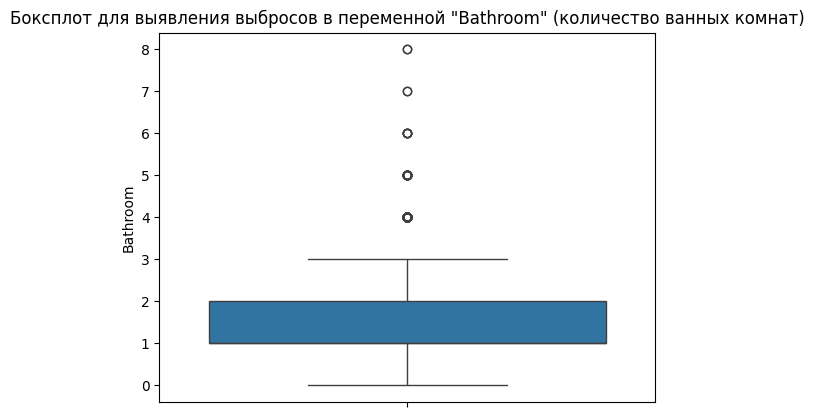

In [ ]:
#  Боксплот по числовой переменной Bathroom (количество ванных комнат):
sns.boxplot(x=None, y='Bathroom', data=df)
plt.title('Боксплот для выявления выбросов в переменной "Bathroom" (количество ванных комнат)'.format('Bathroom'))
plt.ylabel('Bathroom')
plt.show()

In [ ]:
#  IQR для определения выбросов переменной Bathroom

Q1 = df['Bathroom'].quantile(0.25)
Q3 = df['Bathroom'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

#  Количество выбросов переменной Bathroom
print('Верхняя граница диапазона:', upper_bound, '\nКоличество выбросов целевой переменной:', df[target_column][(df['Bathroom'] < lower_bound) | (df['Bathroom'] > upper_bound)].count())

Верхняя граница диапазона: 3.5 
Количество выбросов целевой переменной: 143


Принимая во внимание предыдущий пункт, о том, что в состав выборки могут входить гостевые дома с большим количеством ванных комнат, также принято решение не корректировать значения выбросов.

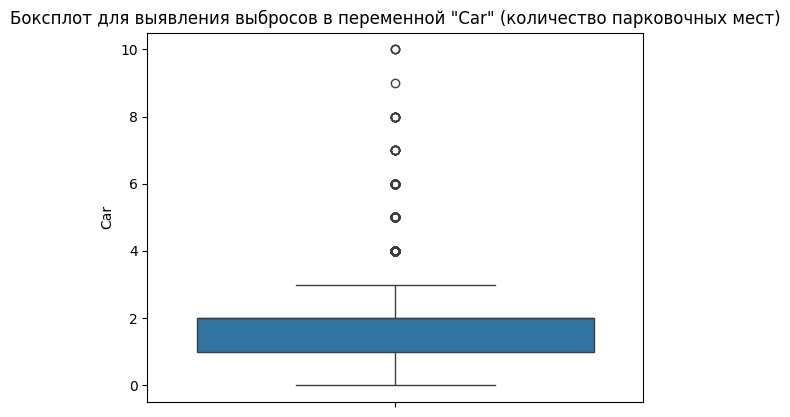

In [ ]:
#  Боксплот по числовой переменной Car (количество парковочных мест):
sns.boxplot(x=None, y='Car', data=df)
plt.title('Боксплот для выявления выбросов в переменной "Car" (количество парковочных мест)'.format('Car'))
plt.ylabel('Car')
plt.show()

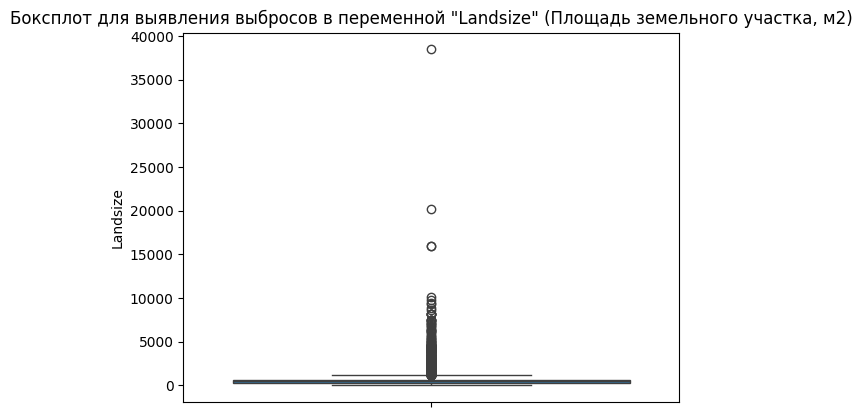

In [ ]:
#  Боксплот по числовой переменной Landsize (Площадь земельного участка):
sns.boxplot(x=None, y='Landsize', data=df)
plt.title('Боксплот для выявления выбросов в переменной "Landsize" (Площадь земельного участка, м2)'.format('Landsize'))
plt.ylabel('Landsize')
plt.show()

In [ ]:
# количество выбросов для переменной Landsize
Q1 = df['Landsize'].quantile(0.25)
Q3 = df['Landsize'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print('Количество выбросов:', df['Landsize'][(df['Landsize'] < lower_bound) | (df['Landsize'] > upper_bound)].count())
print('Верхняя граница:', upper_bound, 'м2')

Количество выбросов: 432
Верхняя граница: 1170.375 м2


Как видно из данных боксплот по выбросам переменной "landsize" (площадь земельного участка), есть 432 значения данной переменной выше верхней границы (свыше 1170 м2), однако, принимая во внимание, что в выборку входит загородная недвижимость, данные значения представляются допустимыми.

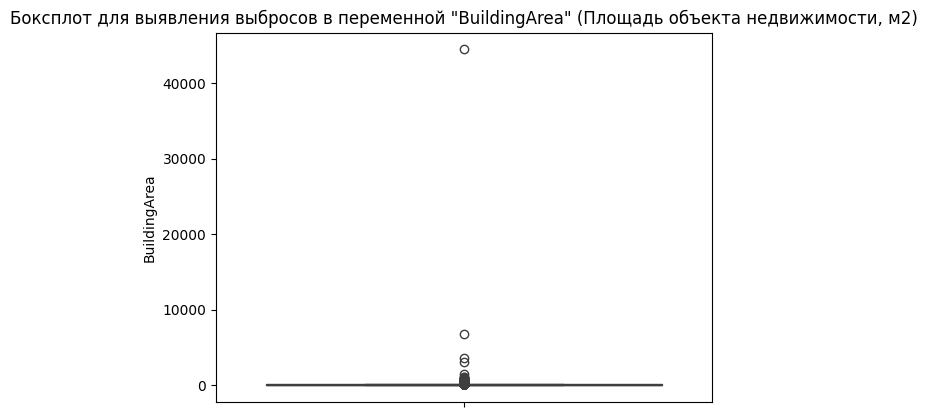

In [ ]:
#  Боксплот по числовой переменной BuildingArea (Площадь объекта недвижимости):
sns.boxplot(x=None, y='BuildingArea', data=df)
plt.title('Боксплот для выявления выбросов в переменной "BuildingArea" (Площадь объекта недвижимости, м2)'.format('BuildingArea'))
plt.ylabel('BuildingArea')
plt.show()

In [ ]:
# количество выбросов для переменной BuildingArea (Площадь объекта недвижимости)
Q1 = df['BuildingArea'].quantile(0.25)
Q3 = df['BuildingArea'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print('Количество выбросов:', df['BuildingArea'][(df['BuildingArea'] < lower_bound) | (df['BuildingArea'] > upper_bound)].count())
print('Верхняя граница:', round(upper_bound, 2), 'м2')

Количество выбросов: 828
Верхняя граница: 228.82 м2


Как видно из данных боксплота по выбросам переменной "BuildingArea" (площадь объекта недвижимости), есть 820 значениq выше границы диапазона (свыше 228 м2).
При этом в выбросах присутствуют явно аномальные значения (свыше 1000 м2).
Принято решение заменить значения переменной свыше 1000 м2 средним значеним признака.

In [ ]:
# Замена выбросов значений переменной 'BuildingArea' средним значением признака
df.loc[df['BuildingArea'] >= 1000, 'BuildingArea'] = df['BuildingArea'].mean()

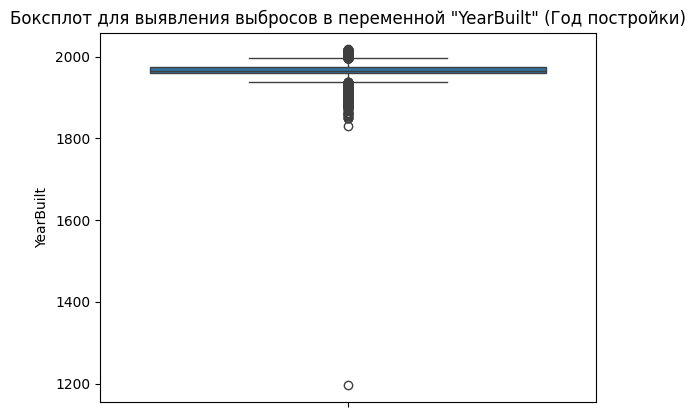

In [ ]:
#  Боксплот по числовой переменной YearBuilt (Год постройки):
sns.boxplot(x=None, y='YearBuilt', data=df)
plt.title('Боксплот для выявления выбросов в переменной "YearBuilt" (Год постройки)'.format('YearBuilt'))
plt.ylabel('YearBuilt')
plt.show()

In [ ]:
# количество выбросов для переменной YearBuilt (Год постройки)
Q1 = df['YearBuilt'].quantile(0.25)
Q3 = df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print('Количество выбросов:', df['YearBuilt'][(df['YearBuilt'] < lower_bound) | (df['YearBuilt'] > upper_bound)].count())
print('Нижняя граница:', round(lower_bound, 2), 'год')

Количество выбросов: 3975
Нижняя граница: 1937.5 год


Заменим выбросы в переменной YearBuilt средним значением

In [ ]:
# Замена выбросов значений переменной 'YearBuilt' средним значением признака
df.loc[df['YearBuilt'] <= 1937, 'YearBuilt'] = df['YearBuilt'].mean()

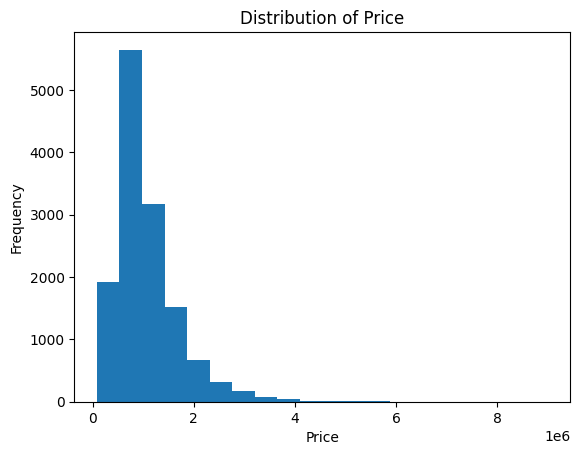

In [ ]:
# Построение гистограммы распределения для целевой переменной 'price'
plt.hist(df['Price'], bins=20)  # 'bins' определяет количество столбцов в гистограмме
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#Анализ:

Rooms           0.496634
Price           1.000000
Distance       -0.162522
Bedroom2        0.475951
Bathroom        0.467038
Car             0.238637
Landsize        0.056493
BuildingArea    0.513489
YearBuilt      -0.117939
Name: Price, dtype: float64


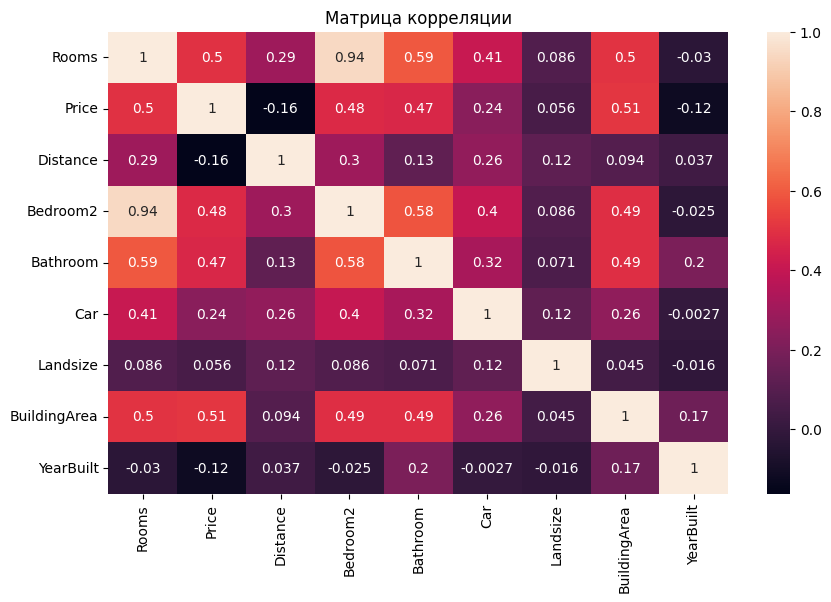

Анализ дисперсии для Suburb:
F-статистика: 19.328308701082396
P-значение: 0.0
---
Анализ дисперсии для Address:
F-статистика: 2.333867556541435
P-значение: 6.858338243958666e-14
---
Анализ дисперсии для Rooms:
F-статистика: 574.0099466122405
P-значение: 0.0
---
Анализ дисперсии для Type:
F-статистика: 1409.0051533559567
P-значение: 0.0
---
Анализ дисперсии для Method:
F-статистика: 42.819148803624735
P-значение: 9.392065939264317e-36
---
Анализ дисперсии для SellerG:
F-статистика: 14.783872729130623
P-значение: 0.0
---
Анализ дисперсии для Distance:
F-статистика: 15.391753157677526
P-значение: 0.0
---
Анализ дисперсии для Bedroom2:
F-статистика: 389.7198089679383
P-значение: 0.0
---
Анализ дисперсии для Bathroom:
F-статистика: 508.5053088307221
P-значение: 0.0
---
Анализ дисперсии для Car:
F-статистика: 135.0968476216779
P-значение: 6.096136263285953e-296
---
Анализ дисперсии для Landsize:
F-статистика: 4.332670589354952
P-значение: 0.0
---
Анализ дисперсии для BuildingArea:
F-статисти

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway

# Загружаем данные:
data = df

# Удаляем неинформативные признаки:
data = data.drop(['Postcode', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount', 'Date'], axis=1)
data
# Разделяем данные на обучающую и тестовую выборки:
X = data.drop('Price', axis=1)  # Независимые переменные
y = data['Price']  # Зависимая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Оценка корреляции
# Вычисляем корреляцию между Price и числовыми признаками:
numeric_columns_correlation = data.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname'], axis=1)
numeric_columns_correlation
correlation_matrix = numeric_columns_correlation.corr()
print(correlation_matrix['Price'])

# Визуализация корреляции:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Матрица корреляции')
plt.show()

# Анализ дисперсии (ANOVA)
# Проверяем влияние независимых категориальных признаков на целевой признак Price:
categorical_features = ['Suburb', 'Address', 'Rooms', 'Type',  'Method', 'SellerG', 'Distance', 'Bedroom2', 'Bathroom',
                        'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname']

# Группируем данные по категориальному признаку:
for feature in categorical_features:
    groups = data.groupby(feature)['Price']
#Анализ дисперсии
    f_statistic, p_value = f_oneway(*[group for name, group in groups])
    print(f"Анализ дисперсии для {feature}:")
    print(f"F-статистика: {f_statistic}")
    print(f"P-значение: {p_value}")
    print("---")

На основе предоставленной матрицы корреляции можно сделать следующие выводы:

1. Сильные положительные корреляции:
   - Между 'Rooms', 'Bedroom' (0.94), 'Bathroom' (0.59), 'BuildinArea' (0.5)
   
    (количество комнат влияет на количество спален и ванных комнат, на площадь дома)
   - Между 'Bedroom' и 'Bathroom' (0.58)

    (взаимосвязь между количеством спален и ванных комнат)

2. Умеренные положительные корреляции:
   - Между 'Rooms' и 'Car' (0.41)

    (взаимосвязь количества комнат и парковочных мест)
   - Между 'Distance', 'Rooms' (0.29), 'Bedroom' (0.3), 'Car' (0.26)

    (умеренная взаимосвязь: при увеличении удаленности от центра увеличивается  количество комнат, спален, парковочных мест в доме)

3. Слабые положительные корреляции:
   - Между 'Distance' и 'Bathroom' (0.13), 'Landsize' (0.12), BuildingArea (0.094)
   - Между 'Car' и 'Landsize' (0.12)
   - Между 'YearBuilt' и 'BuildingArea' (0.17)

4. Отрицательные корреляции:
   - Между 'YearBuilt' и 'Rooms' (-0.03), 'Bedroom' (-0.025), 'Car' (-0.0029)

5. Переменные с низкой корреляцией с целевой переменной 'Price':
   - 'Car' (0.24)
   - 'Landsize' (0.056)

6. Переменные с высокой корреляцией с целевой переменной 'Price':
   - 'BuildingArea' (0.51)
   - 'Rooms' (0.5)
   - 'Bedroom' (0.48)
   - 'Bathroom' (0.47)

7. Переменные с отрицательной корреляцией с целевой переменной 'Price':
   - 'Distance' (-0.16)
   - 'YearBuilt' (-0.12)

8. Признаки: 'BuildingArea' (площадь здания), 'Rooms' (количество комнат), 'Bedroom' (количество спален), 'Bathroom' (количество ванных комнат) наиболее выражено влияют на ключевой признак 'Price' (стоимость).

  В то же время такие признаки, как 'Car' (количество парковочных мест), 'Landsize' (площадь земельного участка), гораздо меньше коррелируют с ключевым признаком.

  Признак 'Distance' и 'YearBuilt' имеют отрицательную корреляцию на целевой признак, что говорит об обратной связи между удаленностью объекта и его стоимостью, а также между годом постройки и стоимостью.

9. Наличие сильных корреляций между некоторыми признаками (например, 'Rooms' и 'Bedroom') может указывать на мультиколлинеарность, что может быть проблемой для некоторых моделей.



Стоит обратить внимание на следующие моменты:

1. 'Landsize' и 'BuildingArea' имеют низкую корреляцию с 'Price' (0.056 и 0.097 соответствено), но данные параметры являются основными характеристиками объектов недвижимости, поэтому их исключение из модели нецелесообразно.

2. 'Distance' также имеет относительно низкую отрицательную корреляцию с 'Price' (-0.16), но тем не менее данный параметр также относится к одним из основных характеристик объекта (географическое расположение). Его также стоит оставить для дальнейшего анализа.

Важно отметить, что решение об исключении переменных должно приниматься не только на основе корреляции, но и с учетом предметной области и возможных нелинейных связей. Рекомендуется также провести дополнительные тесты, такие как анализ важности признаков (feature importance) в контексте выбранной модели машинного обучения, прежде чем окончательно исключать переменные.

##ANOVA:

Интерпретация результатов:

1. Статистическая значимость:
   Все признаки показывают очень низкие p-значения (< 0.05), что указывает на статистически значимую связь между этими признаками и целевой переменной (price). Это означает, что все эти признаки потенциально важны для модели.

2. Сила связи:
   F-статистика указывает на силу связи между признаком и целевой переменной. Чем выше F-статистика, тем сильнее связь. На основе этого мы можем ранжировать признаки по важности:

        a) Type (F = 1409)
        b) Rooms (F = 574)
        c) Bathroom (F = 508)
        d) Bedroom (F = 389)
        e) Regionname (F = 284)
        f) Car (F = 135)
        g) Method (F = 42)
        h) BuilingArea (F = 39)
        i) YearBuilt (F = 24)
        j) Suburb (F = 19)
        k) Distance (F = 15)
        l) SellerG (F = 14)
        m) Landsize (F = 4)

3. Дополнения к предыдущим рекомендациям:

   a) 'BuildingArea', 'Car', и 'Landsize', 'Distance' показывают более высокие F-статистики, чем мы могли ожидать на основе корреляций. Это может указывать на нелинейные отношения с целевой переменной. Возможно, стоит сохранить эти признаки и рассмотреть нелинейные модели или преобразование этих признаков.

   b) Признаки 'Rooms', 'Bathroom', 'Bedroom' показывают очень высокие F-статистики. Это подтверждает наше предыдущее наблюдение об их важности для определения целевого признака.

 4. Дополнительные рекомендации:

   a) Уделить особое внимание признакам с очень высокими F-статистиками (Type, Rooms, Bathroom, Bedroom, Regionname, Car) при создании новых признаков или в процессе feature engineering.

   b) При построении моделей, обратить внимание на возможные взаимодействия между признаками, особенно теми, которые показывают высокие F-статистики.

   c) Рассмотреть возможность использования методов регуляризации (например, Lasso или Ridge регрессия) для автоматического отбора признаков, учитывая, что многие признаки показывают статистическую значимость.

##Графики:

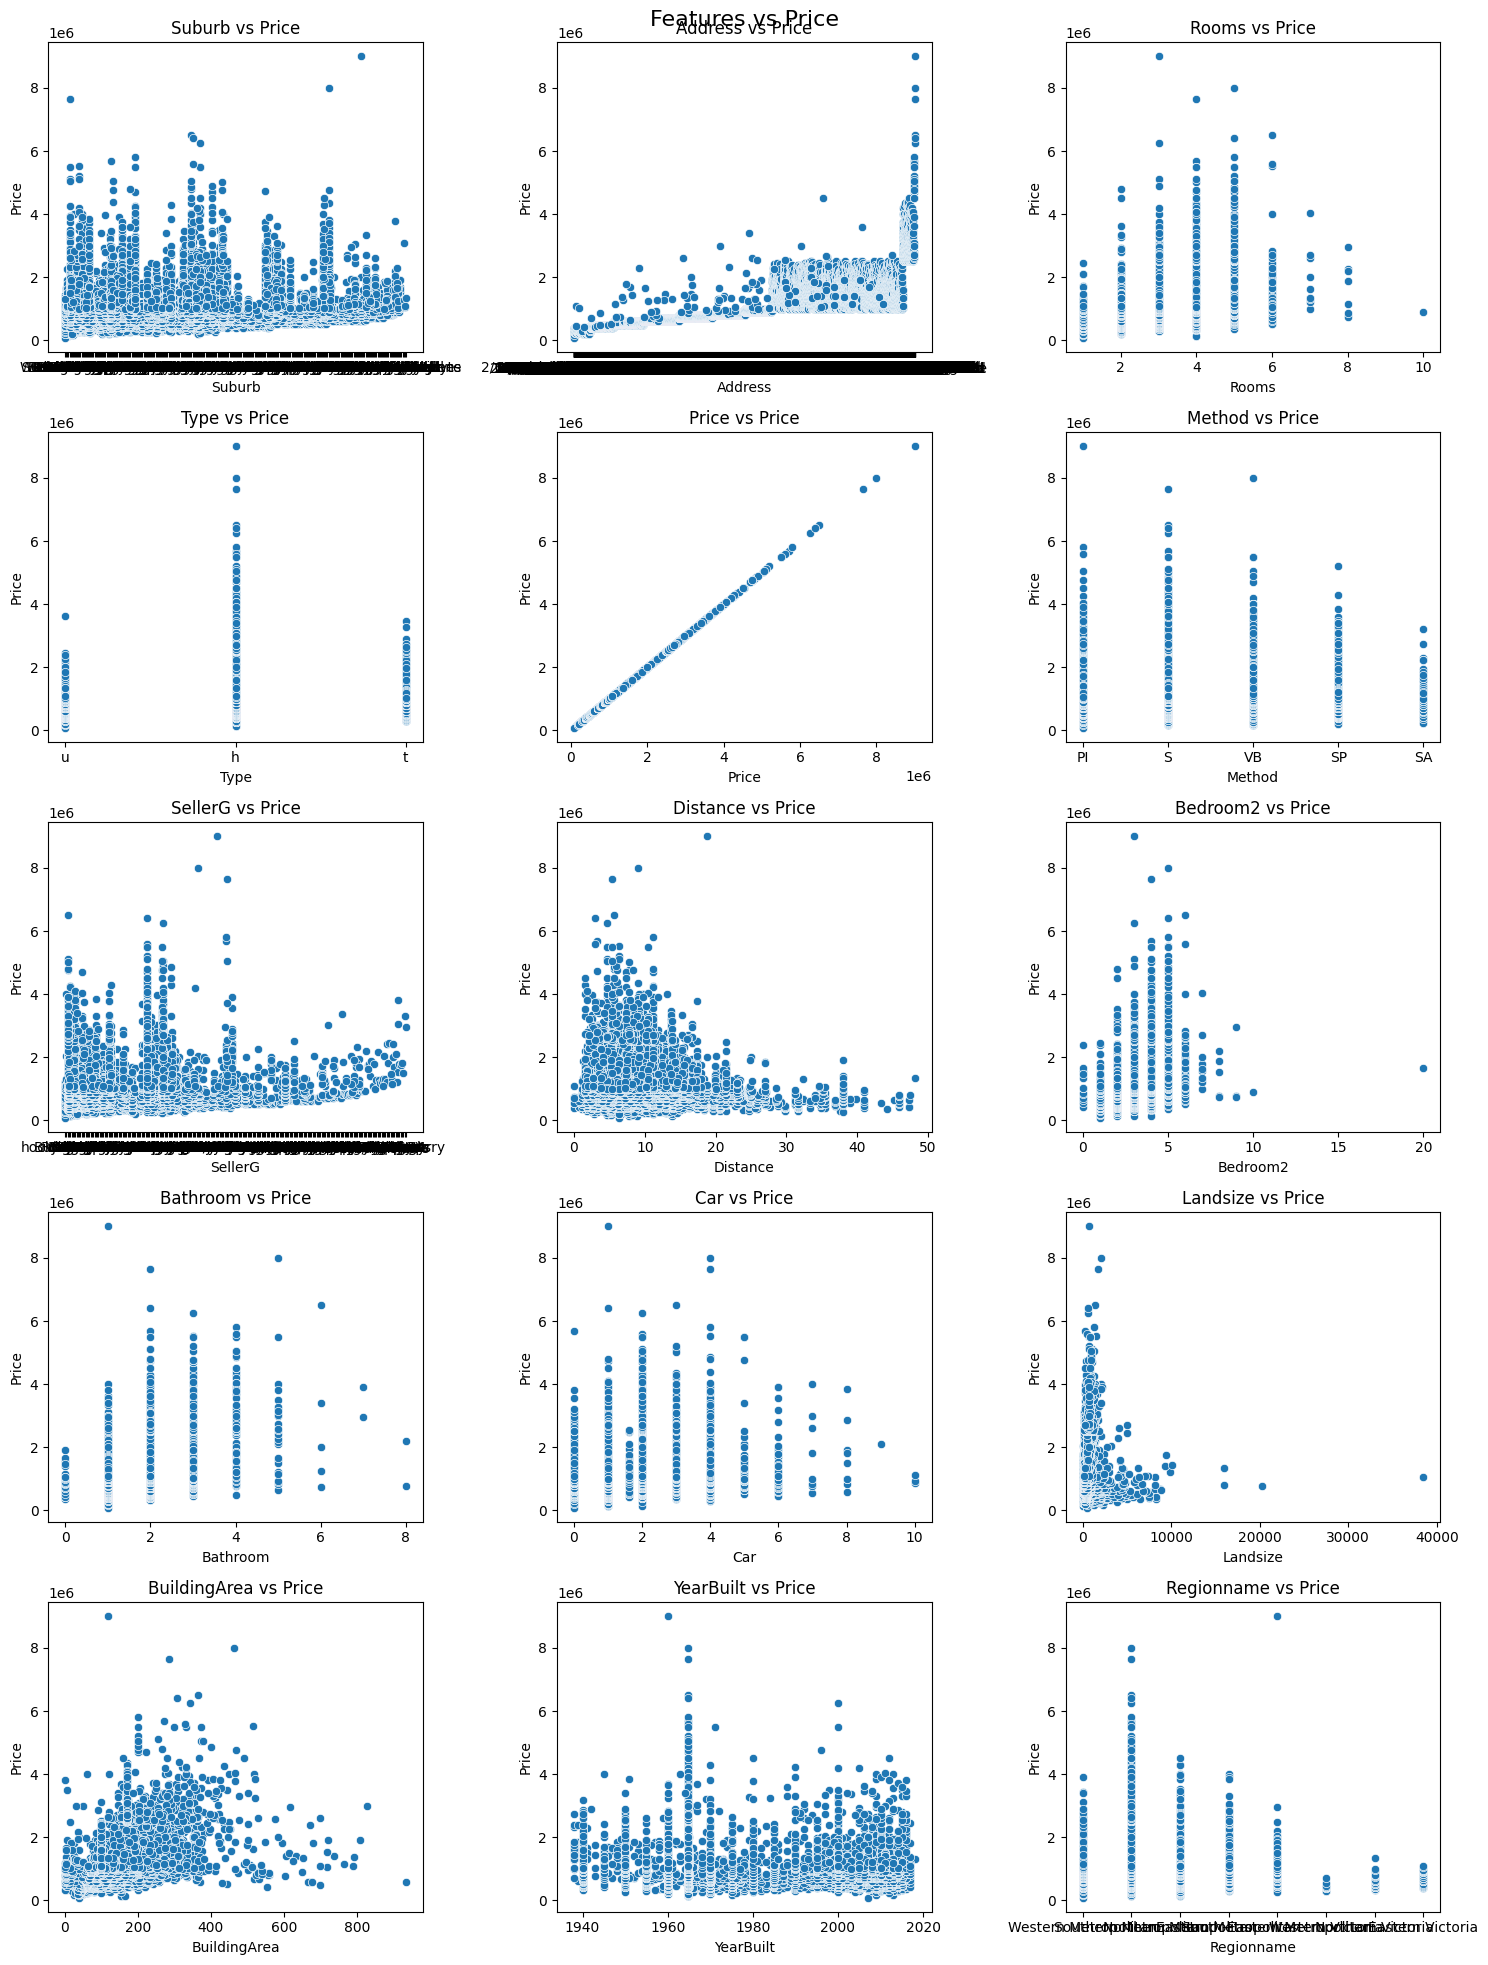

Correlations with 'Price':
Price           1.000000
BuildingArea    0.513489
Rooms           0.496634
Bedroom2        0.475951
Bathroom        0.467038
Car             0.238637
Landsize        0.056493
YearBuilt      -0.117939
Distance       -0.162522
Name: Price, dtype: float64


In [ ]:
# Функция для определения, является ли признак бинарным:
def is_binary(series):
    return set(series.unique()) == {0.0, 1.0}

# Получаем список всех признаков, кроме 'price':
features = [col for col in data.columns if col != 'price']

# Создаем сетку графиков:
n_cols = 3
n_rows = (len(features) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Features vs Price', fontsize=16)

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col] if n_rows > 1 else axes[col]

    if is_binary(data[feature]):
        # Для бинарных признаков используем box plot:
        sns.boxplot(data=data, x=feature, y='Price', ax=ax)
        ax.set_title(f'{feature} vs price (Binary)')
    else:
        # Для непрерывных признаков используем scatter plot:
        sns.scatterplot(data=data, x=feature, y='Price', ax=ax)
        ax.set_title(f'{feature} vs Price')

    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

# Удаляем лишние подграфики:
for i in range(len(features), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

plt.tight_layout()
plt.show()

# Выводим корреляции с целевой переменной:
correlations = numeric_columns_correlation.corr()['Price'].sort_values(ascending=False)
print("Correlations with 'Price':")
print(correlations)

#Модели с учетом важности признаков:

**Вариант с StandardScaler:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Функция для вычисления MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Выделение числовых признаков в датафрейме
data = data.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname'], axis=1)

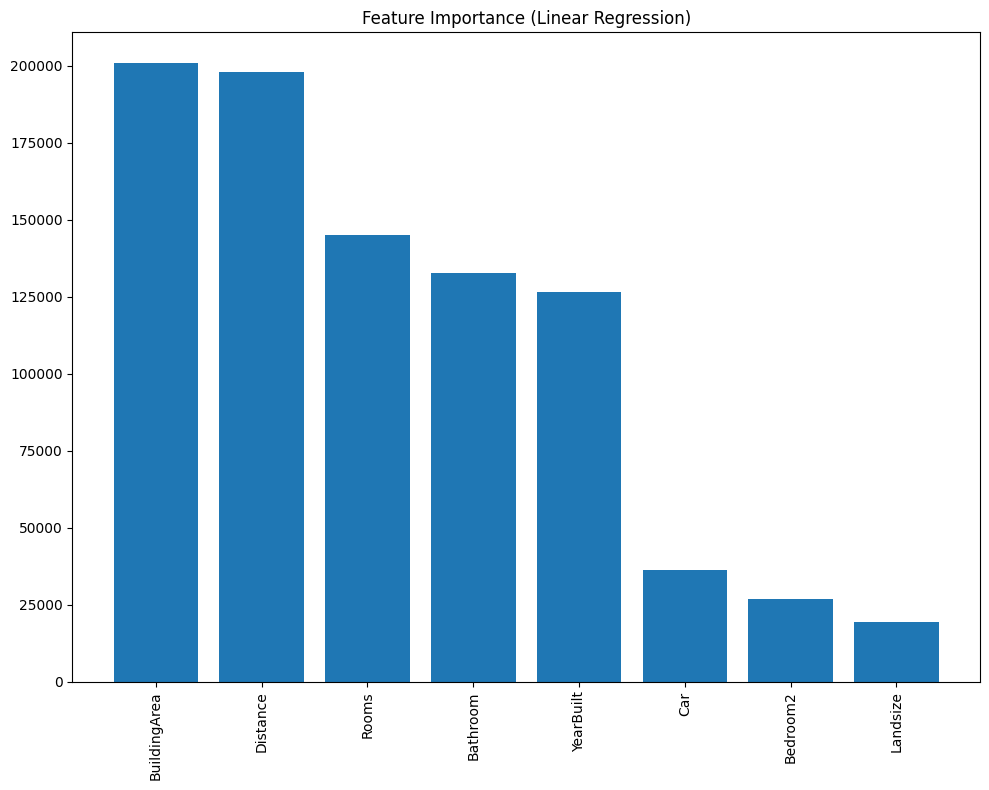


Metrics for Linear Regression:
MAE: 315454.4303
MAPE: 33.1016%
R2: 0.4795
RMSE: 459492.4361

Metrics for KNN:
MAE: 202460.9647
MAPE: 18.8209%
R2: 0.7364
RMSE: 327014.1002


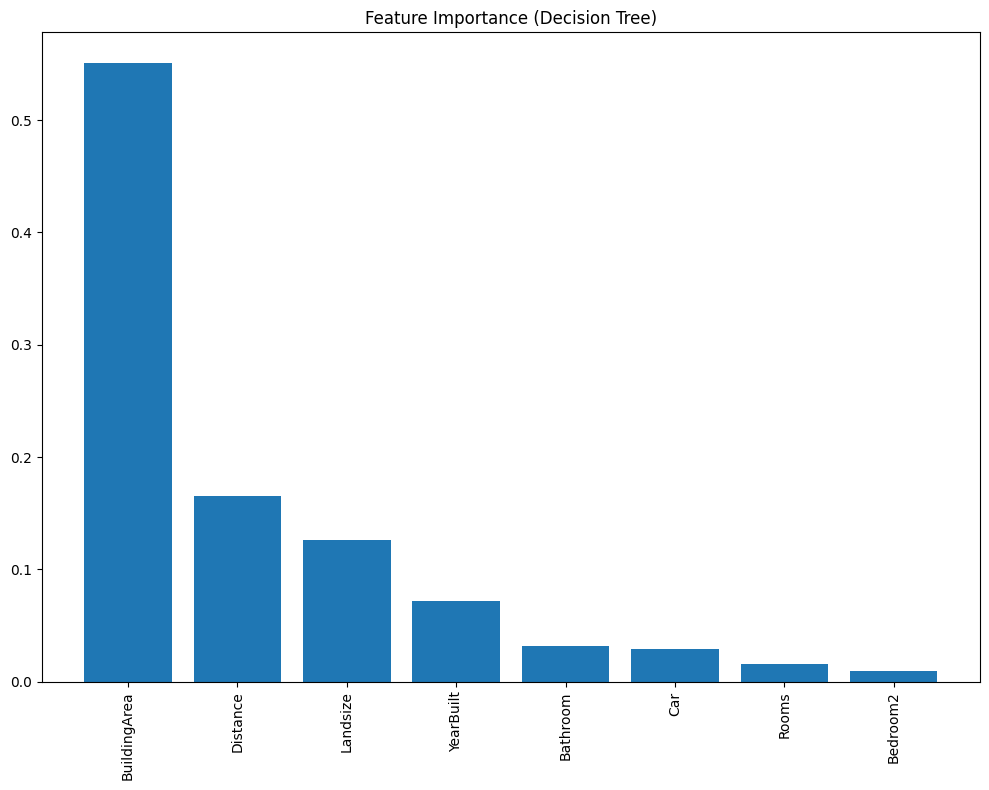


Metrics for Decision Tree:
MAE: 1002.0114
MAPE: 0.1382%
R2: 0.9997
RMSE: 11743.6540


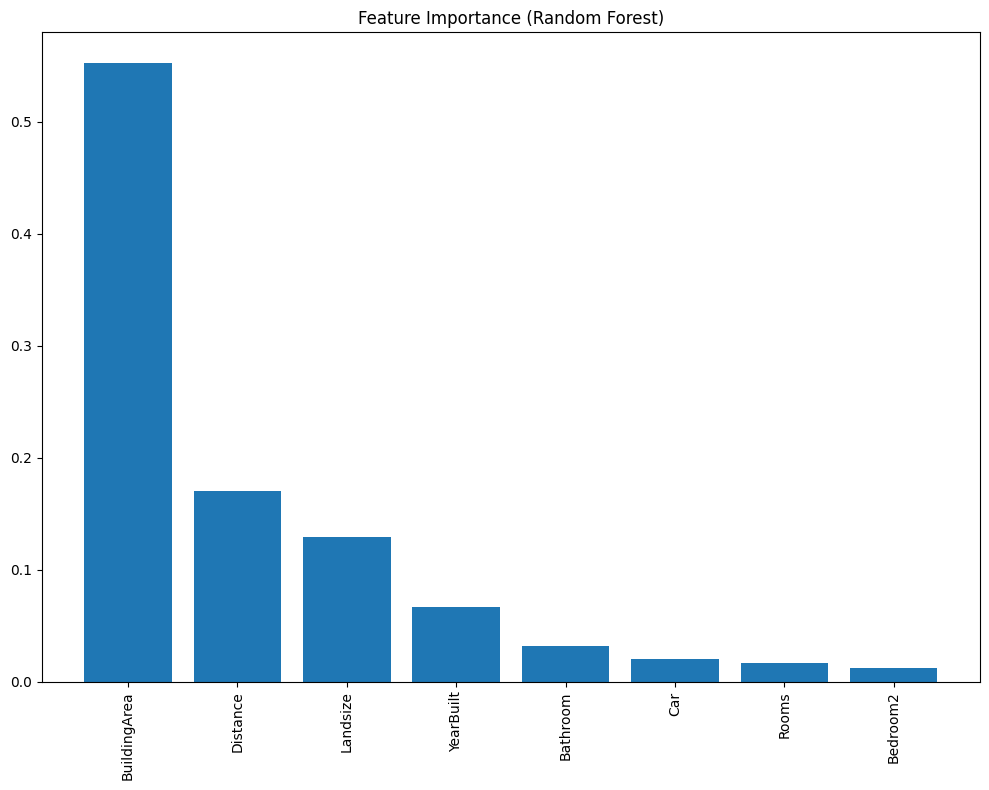


Metrics for Random Forest:
MAE: 69320.3080
MAPE: 6.2345%
R2: 0.9641
RMSE: 120741.7473


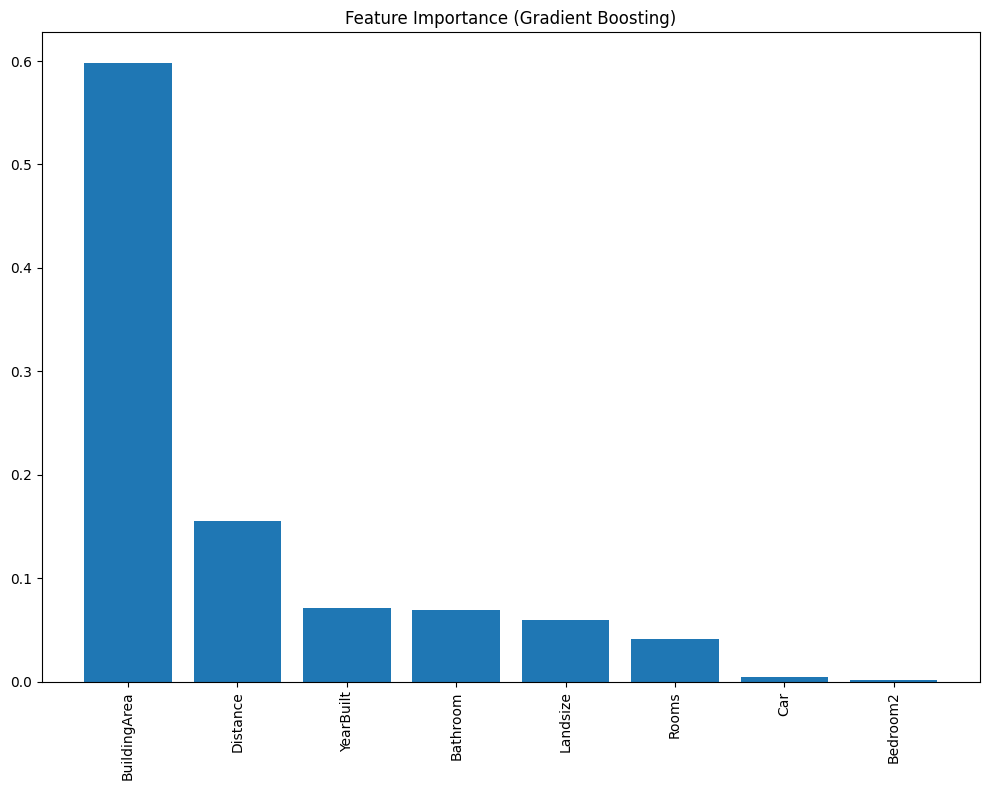


Metrics for Gradient Boosting:
MAE: 199470.9459
MAPE: 19.1851%
R2: 0.7640
RMSE: 309391.5156


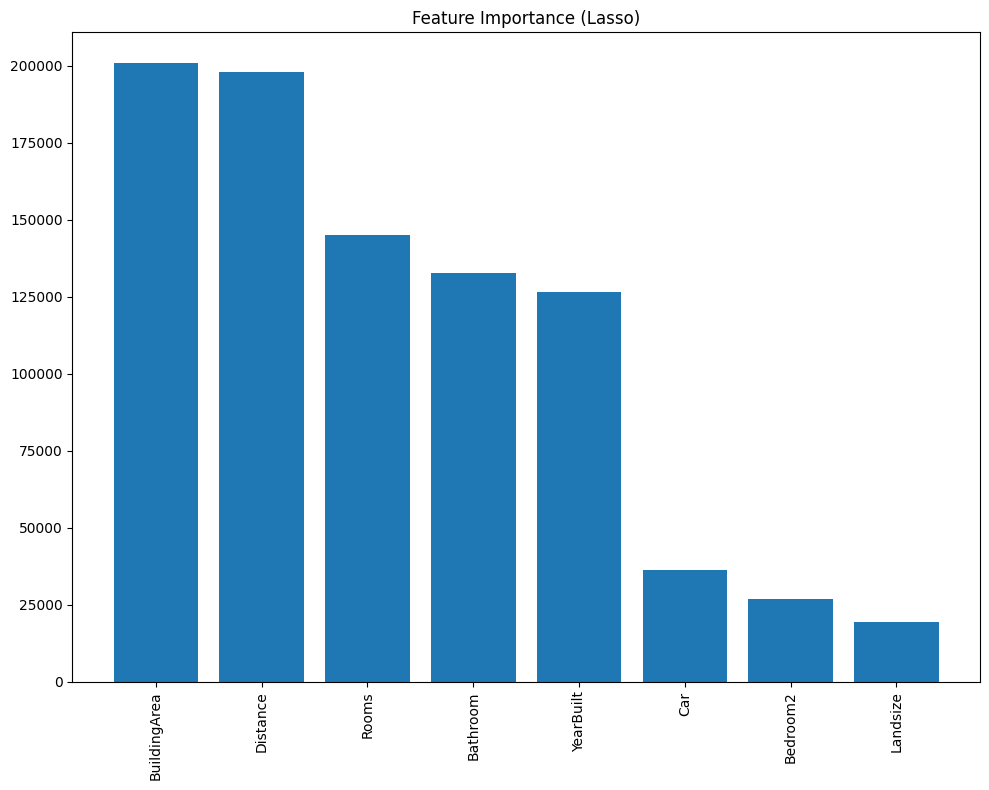


Metrics for Lasso:
MAE: 315454.4151
MAPE: 33.1016%
R2: 0.4795
RMSE: 459492.4361


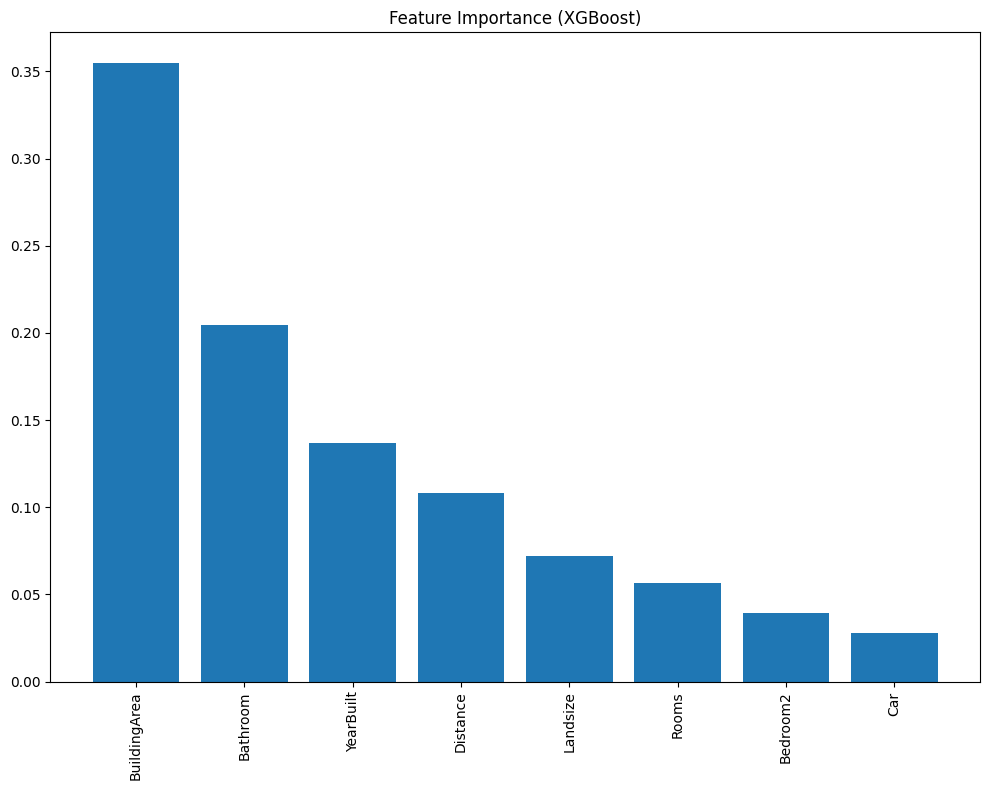


Metrics for XGBoost:
MAE: 117019.2738
MAPE: 11.2901%
R2: 0.9225
RMSE: 177291.8854

Top 10 features by Linear Regression:
        feature     importance
6  BuildingArea  200756.199000
1      Distance  197759.843491
0         Rooms  145153.900395
3      Bathroom  132800.882815
7     YearBuilt  126600.465412
4           Car   36305.620389
2      Bedroom2   26917.778397
5      Landsize   19416.921557

Top 10 features by Decision Tree:
        feature  importance
6  BuildingArea    0.550599
1      Distance    0.164957
5      Landsize    0.126437
7     YearBuilt    0.071577
3      Bathroom    0.032128
4           Car    0.029205
0         Rooms    0.015586
2      Bedroom2    0.009511

Top 10 features by Random Forest:
        feature  importance
6  BuildingArea    0.552045
1      Distance    0.170315
5      Landsize    0.129428
7     YearBuilt    0.066350
3      Bathroom    0.032161
4           Car    0.020615
0         Rooms    0.016782
2      Bedroom2    0.012304

Top 10 features by Gradi

In [ ]:
#трейн выборка

# Функция для оценки модели
def evaluate_model_train(model, X_train, y_train, model_name):
    y_pred_train = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred_train)
    mape = mean_absolute_percentage_error(y_train, y_pred_train)
    r2 = r2_score(y_train, y_pred_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

    print(f"\nMetrics for {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Разделение признаков и целевой переменной
X = data.drop('Price', axis=1)
y = data['Price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Функция для построения графика важности признаков
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))
    plt.bar(range(fi_df.shape[0]), fi_df['feature_importance'])
    plt.title(f'Feature Importance ({model_type})')
    plt.xticks(range(fi_df.shape[0]), fi_df['feature_names'], rotation=90)
    plt.tight_layout()
    plt.show()

# 1. Линейная регрессия
lr_model = LinearRegression() #линейная регрессия
lr_model.fit(X_train_scaled, y_train) #обучение модели на тестовой выборке
plot_feature_importance(np.abs(lr_model.coef_), X.columns, 'Linear Regression') #график важности признаков модели
evaluate_model_train(lr_model, X_train_scaled, y_train, "Linear Regression") #оценка модели

# 2. Метод kNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
evaluate_model_train(knn_model, X_train_scaled, y_train, "KNN")

# 3. Дерево решений
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
plot_feature_importance(dt_model.feature_importances_, X.columns, 'Decision Tree')
evaluate_model_train(dt_model, X_train, y_train, "Decision Tree")

# 4. Случайный лес
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
plot_feature_importance(rf_model.feature_importances_, X.columns, 'Random Forest')
evaluate_model_train(rf_model, X_train, y_train, "Random Forest")

# 5. Градиентный бустинг
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
plot_feature_importance(gb_model.feature_importances_, X.columns, 'Gradient Boosting')
evaluate_model_train(gb_model, X_train, y_train, "Gradient Boosting")

# 6. Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
plot_feature_importance(np.abs(lasso_model.coef_), X.columns, 'Lasso')
evaluate_model_train(lasso_model, X_train_scaled, y_train, "Lasso")

# 7. XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
plot_feature_importance(xgb_model.feature_importances_, X.columns, 'XGBoost')
evaluate_model_train(xgb_model, X_train, y_train, "XGBoost")

# Вывод топ-10 важных признаков для каждой модели (кроме kNN)
models = {
    "Linear Regression": np.abs(lr_model.coef_),
    "Decision Tree": dt_model.feature_importances_,
    "Random Forest": rf_model.feature_importances_,
    "Gradient Boosting": gb_model.feature_importances_,
    "Lasso": np.abs(lasso_model.coef_),
    "XGBoost": xgb_model.feature_importances_
}

for name, importance in models.items():
    print(f"\nTop 10 features by {name}:")
    importance_df = pd.DataFrame({'feature': X.columns, 'importance': importance})
    print(importance_df.sort_values('importance', ascending=False).head(10))

In [ ]:
#Тест выборка
# Функция для оценки модели
def evaluate_model_test(model, X_test, y_test, model_name):
    y_pred_test = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    print(f"\nMetrics for {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

# 1. Линейная регрессия
evaluate_model_test(lr_model, X_test_scaled, y_test, "Linear Regression") #оценка модели

# 2. Метод kNN
evaluate_model_test(knn_model, X_test_scaled, y_test, "KNN")

# 3. Дерево решений
evaluate_model_test(dt_model, X_test, y_test, "Decision Tree")

# 4. Случайный лес
evaluate_model_test(rf_model, X_test, y_test, "Random Forest")

# 5. Градиентный бустинг
evaluate_model_test(gb_model, X_test, y_test, "Gradient Boosting")

# 6. Lasso
evaluate_model_test(lasso_model, X_test_scaled, y_test, "Lasso")

# 7. XGBoost
evaluate_model_test(xgb_model, X_test, y_test, "XGBoost")


Metrics for Linear Regression:
MAE: 313793.7149
MAPE: 32.7920%
R2: 0.5050
RMSE: 456443.8073

Metrics for KNN:
MAE: 243282.0678
MAPE: 22.7913%
R2: 0.6340
RMSE: 392479.4360

Metrics for Decision Tree:
MAE: 251926.5346
MAPE: 22.0798%
R2: 0.5180
RMSE: 450416.8168

Metrics for Random Forest:
MAE: 183015.4555
MAPE: 16.4960%
R2: 0.7433
RMSE: 328696.4782

Metrics for Gradient Boosting:
MAE: 202397.6006
MAPE: 19.3055%
R2: 0.7439
RMSE: 328333.9869

Metrics for Lasso:
MAE: 313793.6933
MAPE: 32.7920%
R2: 0.5050
RMSE: 456443.8052

Metrics for XGBoost:
MAE: 182667.9755
MAPE: 16.6473%
R2: 0.7712
RMSE: 310311.1319


## Сравнение метрик моделей:

**Сравнение метрик, полученных на трейн и тестовой выборке (StandartScaler):**


<table>
  <tr>
    <th>Model</th>
    <th>MAE трейн </th>
    <th>MAE тест </th>
    <th>MAPE трейн </th>
    <th>MAPE тест </th>
    <th>R2 трейн </th>
    <th>R2 тест </th>
    <th>RMSE трейн </th>
    <th>RMSE тест </th>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>315454.4303</td>
    <td>313793.7149</td>
    <td>33.1016%%</td>
    <td>32.7920%</td>
    <td>0.4795</td>
    <td>0.5050</td>
    <td>459534.1165</td>
    <td>456473.0062</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>202613.7996</td>
    <td>243165.5362</td>
    <td>18.8286%</td>
    <td>22.7819%</td>
    <td>0.7361</td>
    <td>0.6342</td>
    <td>327183.2623</td>
    <td>392408.0017</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>970.3933</td>
    <td>249361.3385</td>
    <td>0.1359%</td>
    <td>21.6455%</td>
    <td>0.9997</td>
    <td>0.5190</td>
    <td>11568.6550</td>
    <td>449964.3490</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>68699.4998</td>
    <td>181732.9194</td>
    <td>6.1782%</td>
    <td>16.3040%</td>
    <td>0.9645</td>
    <td>0.7460</td>
    <td>119934.2216</td>
    <td>326995.9862</td>
  </tr>
  <tr>
    <td>Gradient Boosting</td>
    <td>199815.8701</td>
    <td>203056.0193</td>
    <td>19.2932%</td>
    <td>19.3997%</td>
    <td>0.7628</td>
    <td>0.7420</td>
    <td>310161.5595</td>
    <td>329555.8499</td>
  </tr>
  <tr>
    <td>Lasso</td>
    <td>315490.7954</td>
    <td>313813.7679</td>
    <td>33.1054%</td>
    <td>32.7938%</td>
    <td>0.4794</td>
    <td>0.5050</td>
    <td>459534.1165</td>
    <td>456473.0041</td>
  </tr>
  <tr>
    <td>XGBoost</td>
    <td>114071.5630</td>
    <td>181190.6397</td>
    <td>10.9476%</td>
    <td>16.2661%</td>
    <td>0.9264</td>
    <td>0.7701</td>
    <td>172814.9983</td>
    <td>311096.8030</td>
  </tr>
</table>

**Сравнение моделей:**
1. Gradient Boosting: модель показала один из наилучших результатов на тренировочной и тестовой выборке:

  Самый высокий R2 (0,76/0,74), что говорит о довольно высокой предсказательной способности целевой переменной на основе выбранных признаков.

  При этом модель имеет близкие к среднему (относительно остальных моделей) показатели MAE, MAPE, RMSE.

  Важным фактором является то, что значение метрик в тренировочной и тестовой выборке, в том числе R2, практически одинаковы, что говорит о стабильности данной модели.

2. KNN: модель показала неплохие результаты на тренировочной выборке:

  Сопоставимый с Gradient Boosting R2 (0,73).
  
  Однако на тестовой выборке R2 снизился (0,63), что говорит о некоторой нестабильности модели.

  Модель также имеет средние показатели MAE, MAPE, RMSE.

3. Decision Tree, Random Forest, XGBoost: метрики качества говорят о том, что модели переобучены и имеет низкую повторяемость.
  
  Decision Tree: Очень высокий R2 (0,99) и очень низкие MAE, MAPE и RMSE на тренировочной выборке, при этом снижение R2 (0,51), увеличение MAE, MAPE и RMSE на тестовой выборке.

  Random Forest: Высокий R2 (0,96), довольное низкие MAE, MAPE, RMSE на тренировочной выборке, на тестовой выборке R2 снижен (0,74), метрики MAE, MAPE имеют средние значения.

  XGBoost: Высокий R2 (0,92), довольно низкие MAE, MAPE, RMSE на тренировочной выборке, снижение R2 (0,77), средние показатели MAE, MAPE, RMSE на тестовой выборке.

6. Linear Regression и Lasso: модели показали низкие результаты:
  
  Самый низкий R2 (0,47/0,50), при этом самые высокие значения MAE, MAPE, RMSE.

  Из положительных сторон можно отметить стабильность метрик на тренировочной и тестовой выборках.


**Вариант с MinMaxScaler:**

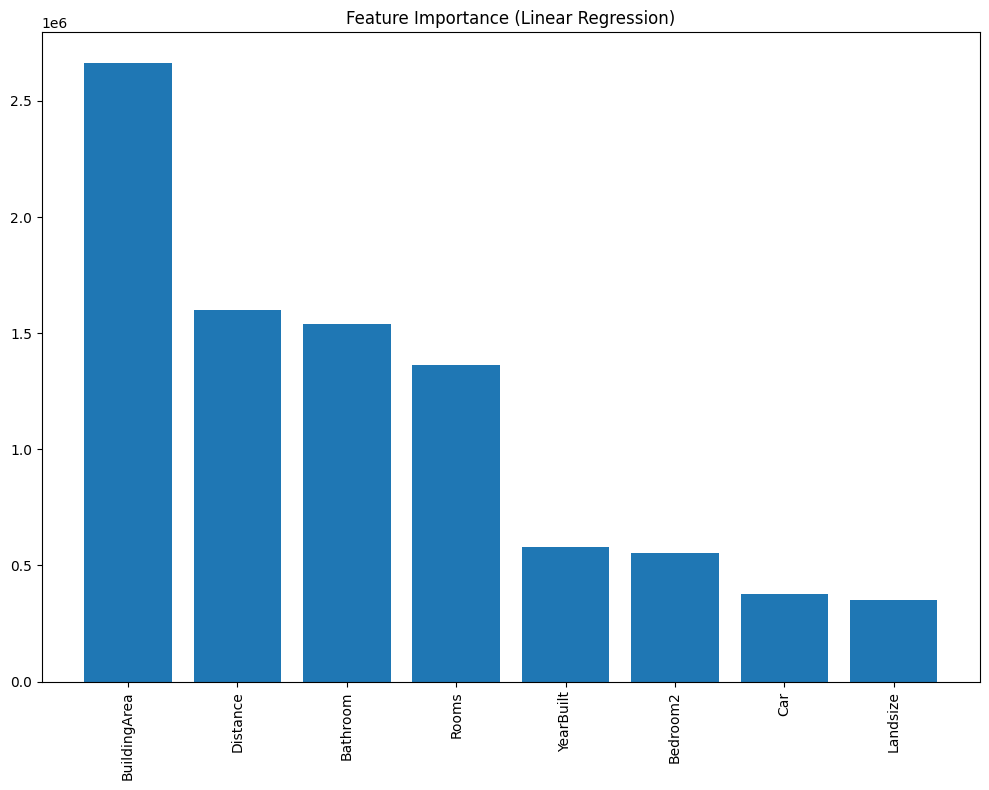


Metrics for Linear Regression:
MAE: 315454.4303
MAPE: 33.1016%
R2: 0.4795
RMSE: 459492.4361

Metrics for KNN:
MAE: 202894.3549
MAPE: 18.9128%
R2: 0.7380
RMSE: 326011.4729


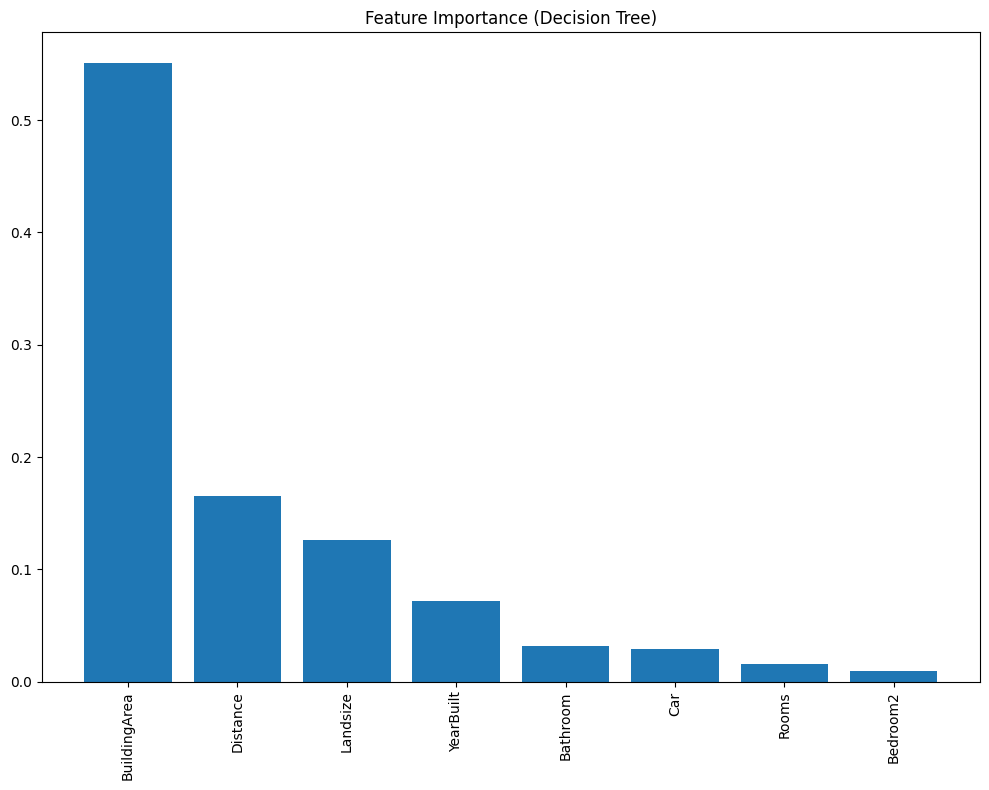


Metrics for Decision Tree:
MAE: 1002.0114
MAPE: 0.1382%
R2: 0.9997
RMSE: 11743.6540


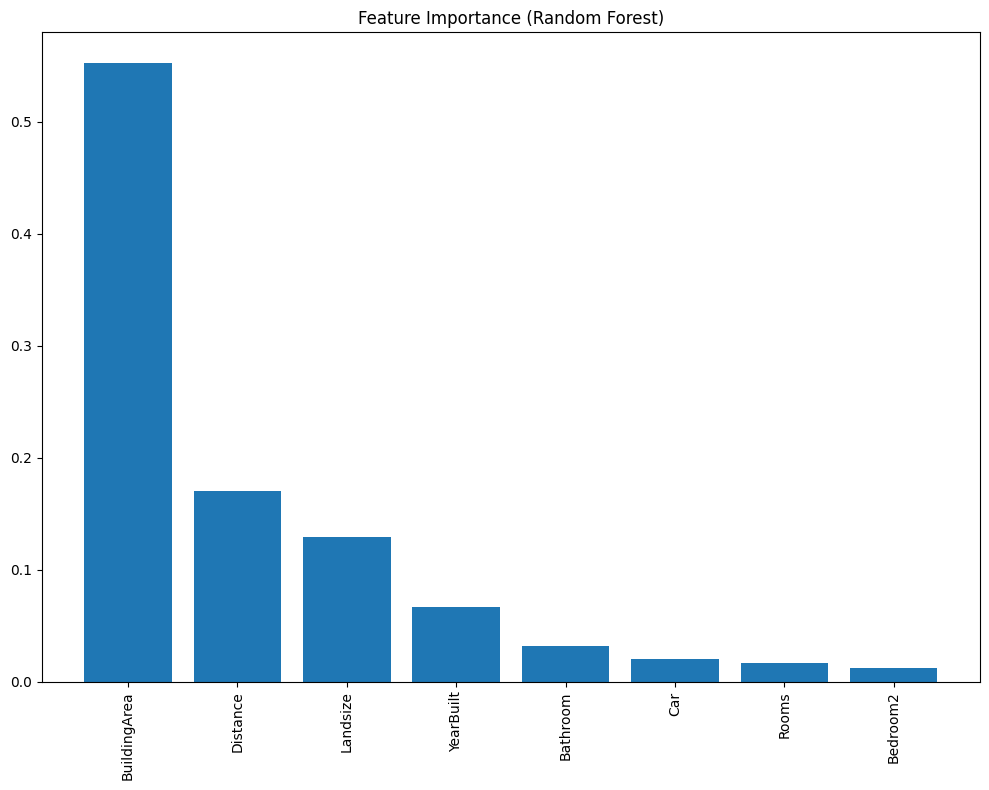


Metrics for Random Forest:
MAE: 69320.3080
MAPE: 6.2345%
R2: 0.9641
RMSE: 120741.7473


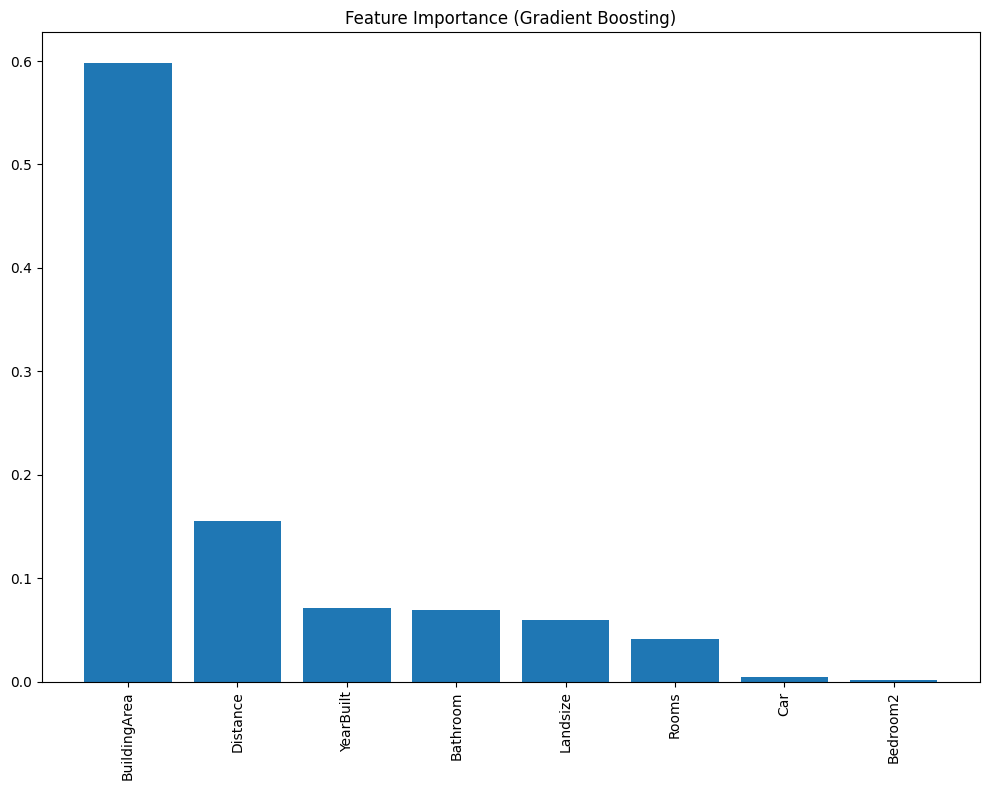


Metrics for Gradient Boosting:
MAE: 199470.9459
MAPE: 19.1851%
R2: 0.7640
RMSE: 309391.5156


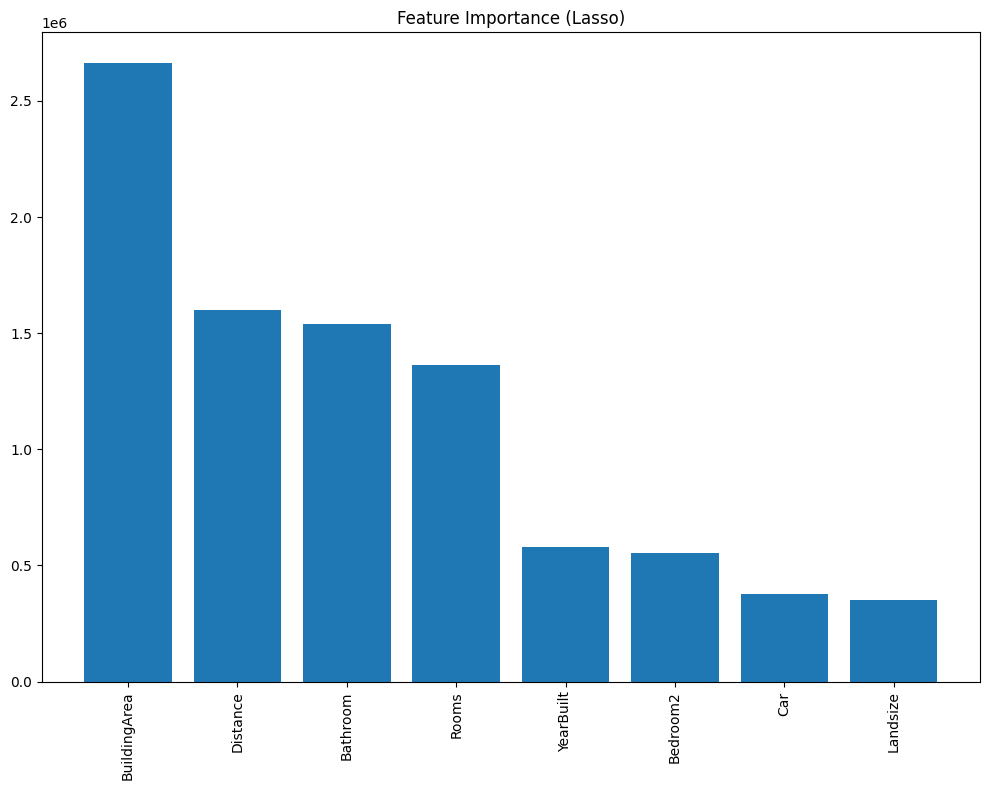


Metrics for Lasso:
MAE: 315454.3197
MAPE: 33.1016%
R2: 0.4795
RMSE: 459492.4361


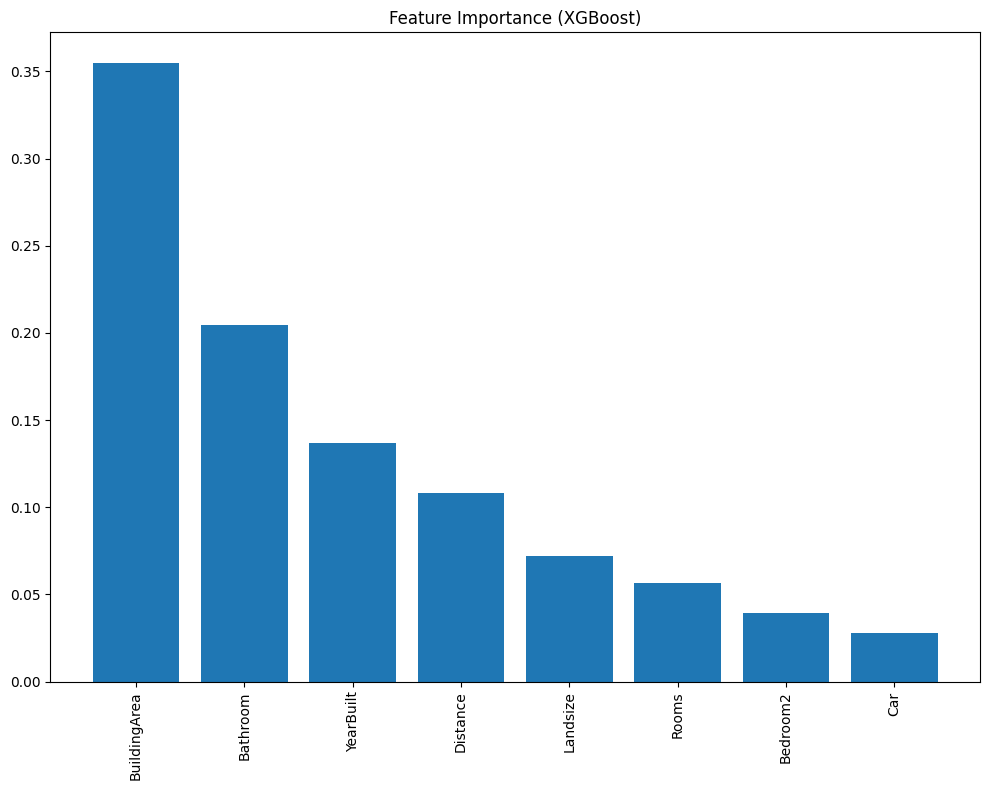


Metrics for XGBoost:
MAE: 117019.2738
MAPE: 11.2901%
R2: 0.9225
RMSE: 177291.8854

Top 10 features by Linear Regression:
        feature    importance
6  BuildingArea  2.661895e+06
1      Distance  1.601291e+06
3      Bathroom  1.537609e+06
0         Rooms  1.361489e+06
7     YearBuilt  5.816091e+05
2      Bedroom2  5.535819e+05
4           Car  3.767472e+05
5      Landsize  3.517856e+05

Top 10 features by Decision Tree:
        feature  importance
6  BuildingArea    0.550599
1      Distance    0.164957
5      Landsize    0.126437
7     YearBuilt    0.071577
3      Bathroom    0.032128
4           Car    0.029205
0         Rooms    0.015586
2      Bedroom2    0.009511

Top 10 features by Random Forest:
        feature  importance
6  BuildingArea    0.552045
1      Distance    0.170315
5      Landsize    0.129428
7     YearBuilt    0.066350
3      Bathroom    0.032161
4           Car    0.020615
0         Rooms    0.016782
2      Bedroom2    0.012304

Top 10 features by Gradient Boost

In [ ]:
#трейн выборка
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Функция для вычисления MAPE:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Функция для оценки модели:
def evaluate_model_train2(model, X_train, y_train, model_name):
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mape = mean_absolute_percentage_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))

    print(f"\nMetrics for {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Разделение признаков и целевой переменной:
X = data.drop('Price', axis=1)
y = data['Price']

# Разделение на обучающую и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков:
from sklearn.preprocessing import MinMaxScaler
# Инициализация MinMaxScaler:
scaler = MinMaxScaler()
# Масштабирование тренировочных данных:
X_train_scaled = scaler.fit_transform(X_train)
# Масштабирование тестовых данных:
X_test_scaled = scaler.transform(X_test)

# Функция для построения графика важности признаков:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))
    plt.bar(range(fi_df.shape[0]), fi_df['feature_importance'])
    plt.title(f'Feature Importance ({model_type})')
    plt.xticks(range(fi_df.shape[0]), fi_df['feature_names'], rotation=90)
    plt.tight_layout()
    plt.show()

# 1. Линейная регрессия:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
plot_feature_importance(np.abs(lr_model.coef_), X.columns, 'Linear Regression')
evaluate_model_train2(lr_model, X_train_scaled, y_train, "Linear Regression")

# 2. Метод kNN:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
evaluate_model_train2(knn_model, X_train_scaled, y_train, "KNN")

# 3. Дерево решений:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
plot_feature_importance(dt_model.feature_importances_, X.columns, 'Decision Tree')
evaluate_model_train2(dt_model, X_train, y_train, "Decision Tree")

# 4. Случайный лес:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
plot_feature_importance(rf_model.feature_importances_, X.columns, 'Random Forest')
evaluate_model_train2(rf_model, X_train, y_train, "Random Forest")

# 5. Градиентный бустинг:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
plot_feature_importance(gb_model.feature_importances_, X.columns, 'Gradient Boosting')
evaluate_model_train2(gb_model, X_train, y_train, "Gradient Boosting")

# 6. Lasso:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
plot_feature_importance(np.abs(lasso_model.coef_), X.columns, 'Lasso')
evaluate_model_train2(lasso_model, X_train_scaled, y_train, "Lasso")

# 7. XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
plot_feature_importance(xgb_model.feature_importances_, X.columns, 'XGBoost')
evaluate_model_train2(xgb_model, X_train, y_train, "XGBoost")

# Вывод топ-10 важных признаков для каждой модели (кроме kNN):
models = {
    "Linear Regression": np.abs(lr_model.coef_),
    "Decision Tree": dt_model.feature_importances_,
    "Random Forest": rf_model.feature_importances_,
    "Gradient Boosting": gb_model.feature_importances_,
    "Lasso": np.abs(lasso_model.coef_),
    "XGBoost": xgb_model.feature_importances_
}

for name, importance in models.items():
    print(f"\nTop 10 features by {name}:")
    importance_df = pd.DataFrame({'feature': X.columns, 'importance': importance})
    print(importance_df.sort_values('importance', ascending=False).head(10))

In [ ]:
#Тест выборка
# Функция для оценки модели
def evaluate_model_test2(model, X_test, y_test, model_name):
    y_pred_test = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    print(f"\nMetrics for {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

# 1. Линейная регрессия
evaluate_model_test2(lr_model, X_test_scaled, y_test, "Linear Regression") #оценка модели

# 2. Метод kNN
evaluate_model_test2(knn_model, X_test_scaled, y_test, "KNN")

# 3. Дерево решений
evaluate_model_test2(dt_model, X_test, y_test, "Decision Tree")

# 4. Случайный лес
evaluate_model_test2(rf_model, X_test, y_test, "Random Forest")

# 5. Градиентный бустинг
evaluate_model_test2(gb_model, X_test, y_test, "Gradient Boosting")

# 6. Lasso
evaluate_model_test2(lasso_model, X_test_scaled, y_test, "Lasso")

# 7. XGBoost
evaluate_model_test2(xgb_model, X_test, y_test, "XGBoost")


Metrics for Linear Regression:
MAE: 313793.7149
MAPE: 32.7920%
R2: 0.5050
RMSE: 456443.8073

Metrics for KNN:
MAE: 249658.3474
MAPE: 23.4028%
R2: 0.6156
RMSE: 402220.1638

Metrics for Decision Tree:
MAE: 251926.5346
MAPE: 22.0798%
R2: 0.5180
RMSE: 450416.8168

Metrics for Random Forest:
MAE: 183015.4555
MAPE: 16.4960%
R2: 0.7433
RMSE: 328696.4782

Metrics for Gradient Boosting:
MAE: 202397.6006
MAPE: 19.3055%
R2: 0.7439
RMSE: 328333.9869

Metrics for Lasso:
MAE: 313793.4277
MAPE: 32.7919%
R2: 0.5050
RMSE: 456443.6899

Metrics for XGBoost:
MAE: 182667.9755
MAPE: 16.6473%
R2: 0.7712
RMSE: 310311.1319


## Сравнение метрик моделей:

**Сравнение метрик, полученных на трейн и тестовой выборке (MinMaxScaler):**


<table>
  <tr>
    <th>Model</th>
    <th>MAE трейн </th>
    <th>MAE тест </th>
    <th>MAPE трейн </th>
    <th>MAPE тест </th>
    <th>R2 трейн </th>
    <th>R2 тест </th>
    <th>RMSE трейн </th>
    <th>RMSE тест </th>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>315454.4303</td>
    <td>313793.7149</td>
    <td>33.1016%</td>
    <td>32.7920%</td>
    <td>0.4795</td>
    <td>0.5050</td>
    <td>459492.1165</td>
    <td>456443.0062</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>202894.7996</td>
    <td>249658.5362</td>
    <td>18.9186%</td>
    <td>23.4001%</td>
    <td>0.7361</td>
    <td>0.6142</td>
    <td>326011.2623</td>
    <td>402220.0017</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>1002.3933</td>
    <td>251926.3385</td>
    <td>0.1359%</td>
    <td>22.0755%</td>
    <td>0.9997</td>
    <td>0.5190</td>
    <td>11743.6550</td>
    <td>450416.3490</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>69320.4998</td>
    <td>183015.9194</td>
    <td>6.2382%</td>
    <td>16.4940%</td>
    <td>0.9645</td>
    <td>0.7460</td>
    <td>120741.2216</td>
    <td>328696.9862</td>
  </tr>
  <tr>
    <td>Gradient Boosting</td>
    <td>199470.8701</td>
    <td>202397.0193</td>
    <td>19.1832%</td>
    <td>19.3097%</td>
    <td>0.7628</td>
    <td>0.7420</td>
    <td>309391.5595</td>
    <td>328333.8499</td>
  </tr>
  <tr>
    <td>Lasso</td>
    <td>315454.7954</td>
    <td>313793.7679</td>
    <td>33.1054%</td>
    <td>32.7438%</td>
    <td>0.4794</td>
    <td>0.5050</td>
    <td>459492.1165</td>
    <td>456443.0041</td>
  </tr>
  <tr>
    <td>XGBoost</td>
    <td>117019.5630</td>
    <td>182667.6397</td>
    <td>11.2976%</td>
    <td>16.6461%</td>
    <td>0.9264</td>
    <td>0.7701</td>
    <td>177291.9983</td>
    <td>310311.8030</td>
  </tr>
</table>


**Сравнение моделей:**

При использовании MinMaxScaler преобразователя для каждой из моделей были получены примерно те же значения метрик, что и в случае со StandartScaler:
1. Gradient Boosting: модель показала один из наилучших результатов на тренировочной и тестовой выборке.

2. KNN: модель показала неплохие результаты на тренировочной выборке, но снижение R2 на тестовой.

3. Decision Tree, Random Forest, XGBoost: метрики качества говорят о том, что модели переобучены и имеет низкую повторяемость.

4. Linear Regression и Lasso: модели показали самые низкие результаты.
  

## Топ-10 важных признаков по моделям:

### Linear Regression

    feature       importance
    ________________________
    BuildingArea  2.661895e+06
    Distance      1.601291e+06
    Bathroom      1.537609e+06
    Rooms         1.361489e+06
    YearBuilt     5.816091e+05
    Bedroom2      5.535819e+05
    Car           3.767472e+05
    Landsize      3.517856e+05

### Decision Tree:

    feature       importance
    ________________________
    BuildingArea  0.550599
    Distance      0.164957
    Landsize      0.126437
    YearBuilt     0.071577
    Bathroom      0.032128
    Car           0.029205
    Rooms         0.015586
    Bedroom2      0.009511

### Random Forest:
    feature  importance
    ________________________
    BuildingArea    0.552045
    Distance        0.170315
    Landsize        0.129428
    YearBuilt       0.066350
    Bathroom        0.032161
    Car             0.020615
    Rooms           0.016782
    Bedroom2        0.012304

### Gradient Boosting:
    feature  importance
    ________________________
    BuildingArea    0.597832
    Distance        0.155450
    YearBuilt       0.071508
    Bathroom        0.069114
    Landsize        0.059180
    Rooms           0.040778
    Car             0.004897
    Bedroom2        0.001242

### Lasso:
    feature    importance
    ________________________
    BuildingArea    2.661883e+06
    Distance        1.601279e+06
    Bathroom        1.537605e+06
    Rooms           1.361578e+06
    YearBuilt       5.816064e+05
    Bedroom2        5.533682e+05
    Car             3.767417e+05
    Landsize        3.517547e+05

### XGBoost:
    feature  importance
    ________________________
    BuildingArea    0.354639
    Bathroom        0.204815
    YearBuilt       0.136925
    Distance        0.108059
    Landsize        0.072073
    Rooms           0.056385
    Bedroom2        0.039460
    Car             0.027645

# Выводы:

На основе предоставленных результатов можно сделать следующие выводы:

1. Качество моделей:
   
    - Gradient Boosting: модель показала один из наилучших результатов на тренировочной и тестовой выборке.

    - KNN: модель показала неплохие результаты на тренировочной выборке, но снижение R2 на тестовой.

    - Decision Tree, Random Forest, XGBoost: метрики качества говорят о том, что модели переобучены и имеет низкую повторяемость.

    - Linear Regression и Lasso: модели показали самые низкие результаты.

2. Важность признаков:
   - Разные модели выделяют одинаковы признаки как наиболее важные, что указывает на правильность выбора переменных и высокую коррелюцию.
   - Наиболее часто встречающиеся важные признаки:
     * BuildingArea (площадь объекта недвижимости)
     * Distance (удаленность от центрального делового района)
     * Rooms (количество комнат)
     * Bathroom (количество ванных комнат)
     * YearBuilt (год постройки)
     * Landsize (площадь земельного участка)
     * Bedroom (количество спален)
     * Car (количество парковочных мест)

3. Рекомендации:
   - Сфокусироваться на моделях Gradient Boosting, KNN, Decision Tree, Random Forest, XGBoost, так как они показывают лучшие результаты.
   - Обратить внимание на признаки, которые эти модели считают наиболее важными.
   - Провести дополнительный анализ нелинейных зависимостей между признаками и целевой переменной.
   - Попробовать ансамблевые методы, комбинирующие предсказания лучших моделей.

4. Дальнейшие шаги:
   - Провести гиперпараметрическую оптимизацию для лучших моделей (Gradient Boosting, KNN, Decision Tree, Random Forest, XGBoost).
   - Рассмотреть возможность применения методов отбора признаков для уменьшения размерности данных.
   - Проанализировать выбросы и аномалии в данных, которые могут влиять на качество моделей.

###Подбор гиперпараметров с использованием GridSearchCV и RandomizedSearchCV:

Этот блок кода постоянно завершался отключением от google colab при рассчете на "Подбор гиперпараметров с использованием GridSearchCV для Random Forest". Поэтому ниже он был разделен на несколько частей и "Подбор гиперпараметров с использованием GridSearchCV для Random Forest" рассчитывался отдельно. К сожалению, много раз с одинаковым финалом.

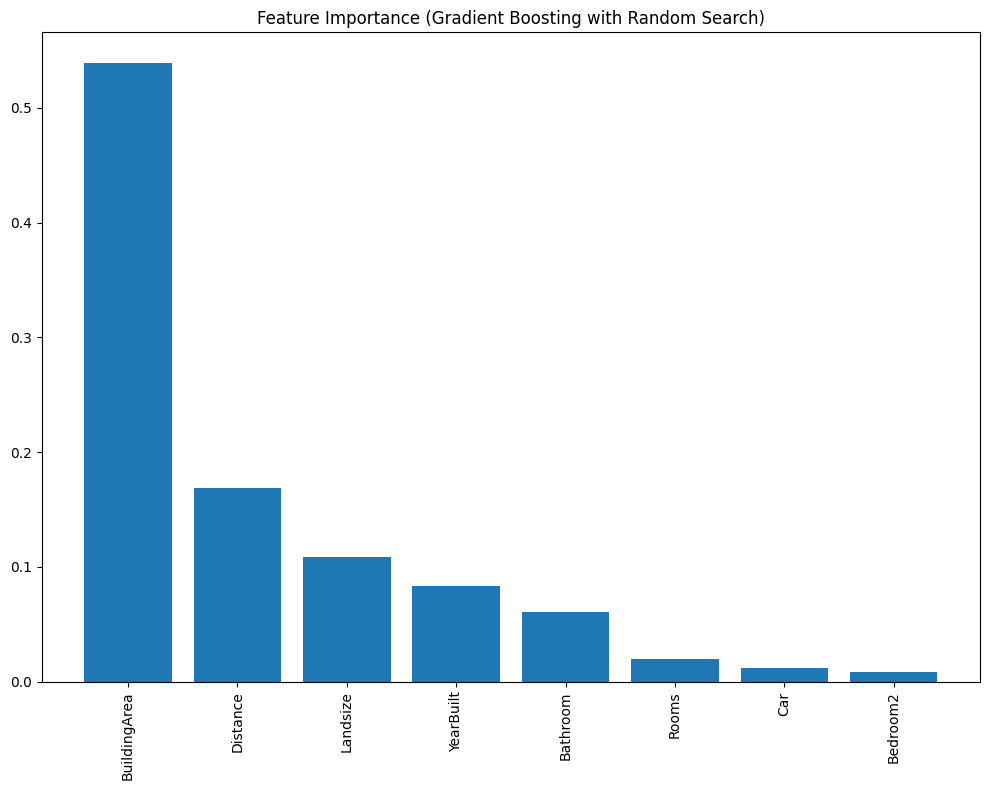


Metrics for Gradient Boosting with Random Search:
MAE: 100453.5465
MAPE: 9.6522%
R2: 0.9436
RMSE: 151257.2332

Metrics for KNN with Grid Search:
MAE: 214679.9893
MAPE: 20.1548%
R2: 0.7061
RMSE: 345300.3745


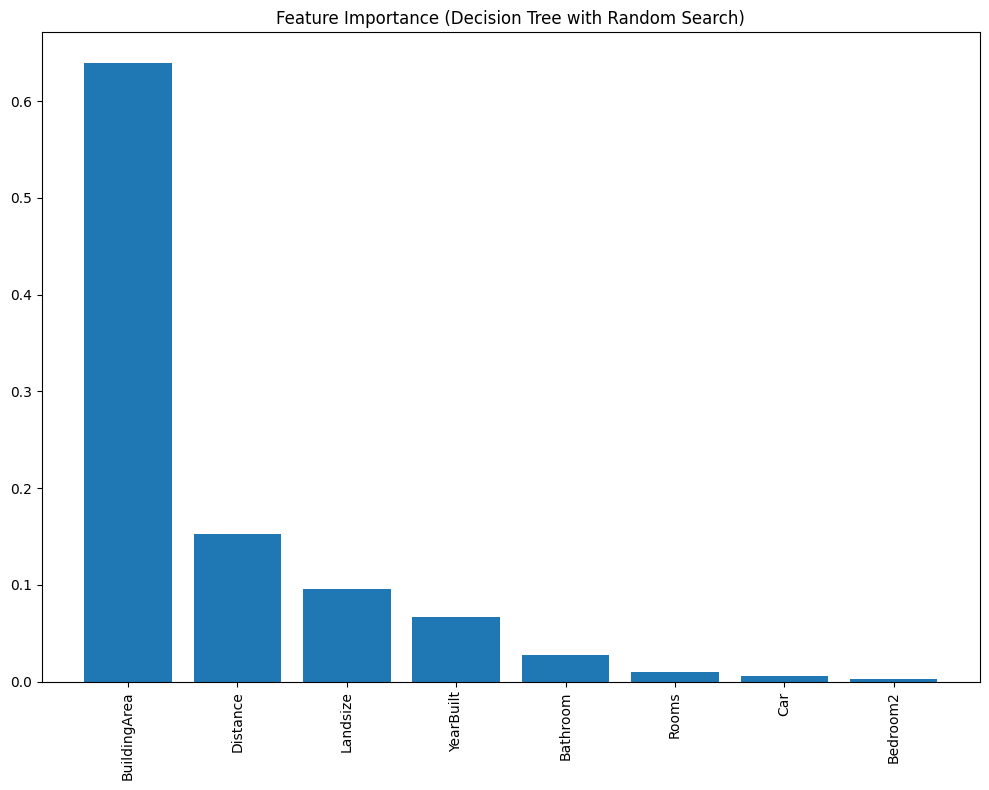


Metrics for Decision Tree with Random Search:
MAE: 164830.0075
MAPE: 14.9444%
R2: 0.8098
RMSE: 277741.5786


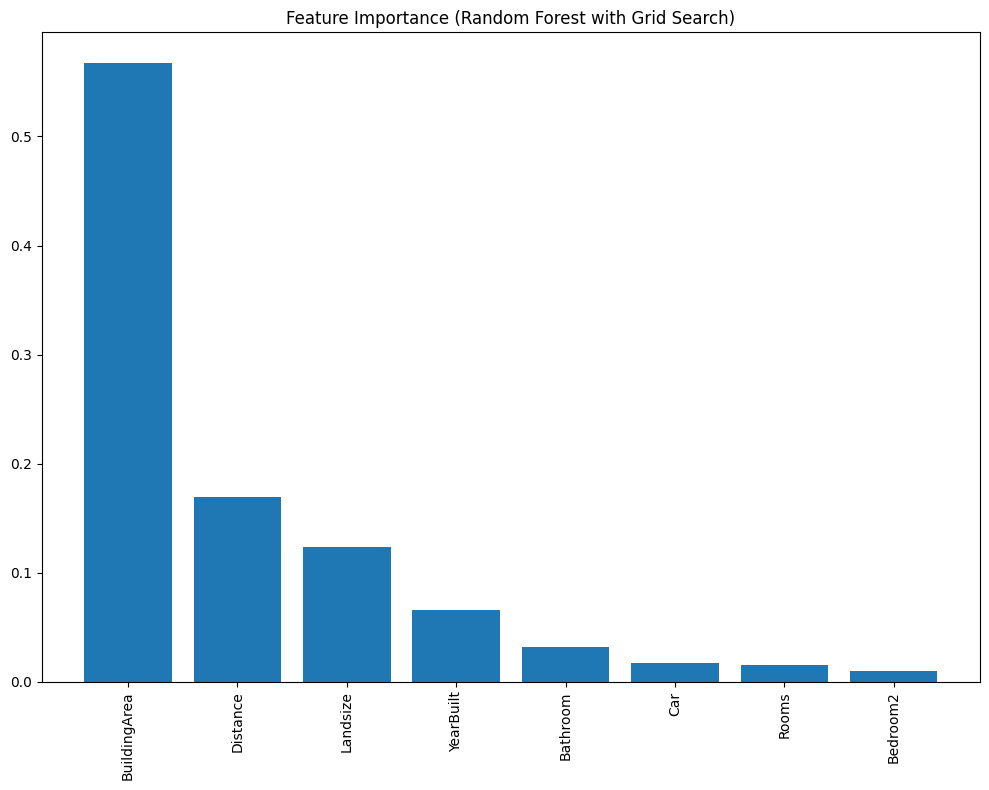


Metrics for Random Forest with Grid Search:
MAE: 87116.7100
MAPE: 7.8056%
R2: 0.9408
RMSE: 154972.3488


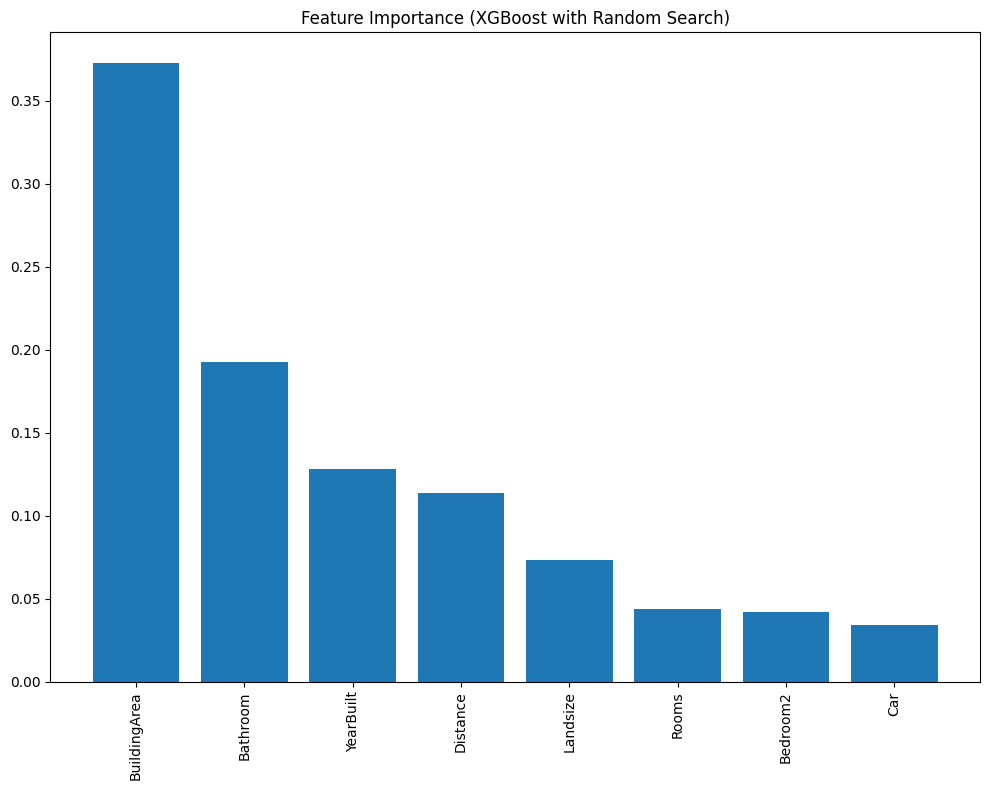


Metrics for XGBoost with Random Search:
MAE: 110505.6824
MAPE: 10.4436%
R2: 0.9272
RMSE: 171788.3283

Top 10 features by Gradient Boosting with Random Search:
        feature  importance
6  BuildingArea    0.538915
1      Distance    0.169004
5      Landsize    0.108535
7     YearBuilt    0.083453
3      Bathroom    0.060919
0         Rooms    0.019350
4           Car    0.011809
2      Bedroom2    0.008014

Top 10 features by Decision Tree with Random Search:
        feature  importance
6  BuildingArea    0.639135
1      Distance    0.152123
5      Landsize    0.095801
7     YearBuilt    0.066347
3      Bathroom    0.027884
0         Rooms    0.009479
4           Car    0.006003
2      Bedroom2    0.003228

Top 10 features by Random Forest with Grid Search:
        feature  importance
6  BuildingArea    0.567171
1      Distance    0.169520
5      Landsize    0.123639
7     YearBuilt    0.065542
3      Bathroom    0.031332
4           Car    0.017207
0         Rooms    0.015532
2     

In [ ]:
#трейн выборка
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Функция для вычисления MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Функция для оценки модели
def evaluate_model_train3(model, X_train, y_train, model_name):
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mape = mean_absolute_percentage_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))

    print(f"\nMetrics for {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Разделение признаков и целевой переменной
X = data.drop('Price', axis=1)
y = data['Price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Функция для построения графика важности признаков
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))
    plt.bar(range(fi_df.shape[0]), fi_df['feature_importance'])
    plt.title(f'Feature Importance ({model_type})')
    plt.xticks(range(fi_df.shape[0]), fi_df['feature_names'], rotation=90)
    plt.tight_layout()
    plt.show()

# Подбор гиперпараметров с использованием RandomizedSearchCV для Gradient Boosting
gb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
gb_random_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_params, n_iter=10, cv=5, scoring='r2', random_state=42)
gb_random_search.fit(X_train, y_train)
gb_best_model = gb_random_search.best_estimator_
plot_feature_importance(gb_best_model.feature_importances_, X.columns, 'Gradient Boosting with Random Search')
evaluate_model_train3(gb_best_model, X_train, y_train, "Gradient Boosting with Random Search")

# Подбор гиперпараметров с использованием GridSearchCV для KNN
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
knn_grid_search.fit(X_train_scaled, y_train)
knn_best_model = knn_grid_search.best_estimator_
evaluate_model_train3(knn_best_model, X_train_scaled, y_train, "KNN with Grid Search")

# Подбор гиперпараметров с использованием RandomizedSearchCV для Decision Tree
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
dt_random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), dt_params, n_iter=10, cv=5, scoring='r2', random_state=42)
dt_random_search.fit(X_train, y_train)
dt_best_model = dt_random_search.best_estimator_
plot_feature_importance(dt_best_model.feature_importances_, X.columns, 'Decision Tree with Random Search')
evaluate_model_train3(dt_best_model, X_train, y_train, "Decision Tree with Random Search")

# Подбор гиперпараметров с использованием GridSearchCV для Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2')
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
plot_feature_importance(rf_best_model.feature_importances_, X.columns, 'Random Forest with Grid Search')
evaluate_model_train3(rf_best_model, X_train, y_train, "Random Forest with Grid Search")

# Подбор гиперпараметров с использованием RandomizedSearchCV для XGBoost
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_random_search = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_params, n_iter=10, cv=5, scoring='r2', random_state=42)
xgb_random_search.fit(X_train, y_train)
xgb_best_model = xgb_random_search.best_estimator_
plot_feature_importance(xgb_best_model.feature_importances_, X.columns, 'XGBoost with Random Search')
evaluate_model_train3(xgb_best_model, X_train, y_train, "XGBoost with Random Search")

# Вывод топ-10 важных признаков для каждой модели
models = {
    "Gradient Boosting with Random Search": gb_best_model.feature_importances_,
    "Decision Tree with Random Search": dt_best_model.feature_importances_,
    "Random Forest with Grid Search": rf_best_model.feature_importances_,
    "XGBoost with Random Search": xgb_best_model.feature_importances_
}

for name, importance in models.items():
    print(f"\nTop 10 features by {name}:")
    importance_df = pd.DataFrame({'feature': X.columns, 'importance': importance})
    print(importance_df.sort_values('importance', ascending=False).head(10))

In [ ]:
#тест выборка

# Функция для оценки модели
def evaluate_model_test3(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\nMetrics for {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Разделение признаков и целевой переменной
X = data.drop('Price', axis=1)
y = data['Price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Функция для построения графика важности признаков
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))
    plt.bar(range(fi_df.shape[0]), fi_df['feature_importance'])
    plt.title(f'Feature Importance ({model_type})')
    plt.xticks(range(fi_df.shape[0]), fi_df['feature_names'], rotation=90)
    plt.tight_layout()
    plt.show()

# Оценка модели с использованием RandomizedSearchCV для Gradient Boosting
evaluate_model_test3(gb_best_model, X_test, y_test, "Gradient Boosting with Random Search")

# оценка модели с использованием GridSearchCV для KNN
evaluate_model_test3(knn_best_model, X_test_scaled, y_test, "KNN with Grid Search")

# Оценка модели с использованием RandomizedSearchCV для Decision Tree
evaluate_model_test3(dt_best_model, X_test, y_test, "Decision Tree with Random Search")

# Подбор гиперпараметров с использованием GridSearchCV для Random Forest
evaluate_model_test3(rf_best_model, X_test, y_test, "Random Forest with Grid Search")

# Подбор гиперпараметров с использованием RandomizedSearchCV для XGBoost
evaluate_model_test3(xgb_best_model, X_test, y_test, "XGBoost with Random Search")


Metrics for Gradient Boosting with Random Search:
MAE: 176002.1896
MAPE: 15.8094%
R2: 0.7823
RMSE: 302686.6958

Metrics for KNN with Grid Search:
MAE: 242643.5583
MAPE: 22.8337%
R2: 0.6470
RMSE: 385489.5743

Metrics for Decision Tree with Random Search:
MAE: 207514.7372
MAPE: 18.5374%
R2: 0.6779
RMSE: 368219.8028

Metrics for Random Forest with Grid Search:
MAE: 181077.3263
MAPE: 16.3660%
R2: 0.7498
RMSE: 324525.2909

Metrics for XGBoost with Random Search:
MAE: 177851.9135
MAPE: 15.9495%
R2: 0.7718
RMSE: 309896.8100


**Сравнение метрик, полученных на трейн и тестовой выборке (GridSearch):**


<table>
  <tr>
    <th>Model</th>
    <th>MAE трейн </th>
    <th>MAE тест </th>
    <th>MAPE трейн </th>
    <th>MAPE тест </th>
    <th>R2 трейн </th>
    <th>R2 тест </th>
    <th>RMSE трейн </th>
    <th>RMSE тест </th>
  </tr>
  <tr>
    <td>Gradient Boosting</td>
    <td>100453.5465</td>
    <td>176002.1896</td>
    <td>9.6522%</td>
    <td>15.8094%</td>
    <td>0.9436</td>
    <td>0.7823</td>
    <td>151257.2332</td>
    <td>302686.6958</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>214679.9893</td>
    <td>242643.5583</td>
    <td>20.1548%</td>
    <td>22.8337%</td>
    <td>0.7061</td>
    <td>0.6470</td>
    <td>345300.3745</td>
    <td>385489.5743</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>164830.0075</td>
    <td>207514.7372</td>
    <td>14.9444%</td>
    <td>18.5374%</td>
    <td>0.8098</td>
    <td>0.6779</td>
    <td>277741.5786</td>
    <td>368219.8028</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>87116.7100</td>
    <td>181077.3263</td>
    <td>7.8056%</td>
    <td>16.3660%</td>
    <td>0.9408</td>
    <td>0.7498</td>
    <td>154972.3488</td>
    <td>324525.2909</td>
  </tr>
  <tr>
    <td>XG Boost</td>
    <td>110505.6824</td>
    <td>177851.9135</td>
    <td>10.4436%</td>
    <td>15.9495%</td>
    <td>0.9272</td>
    <td>0.7718</td>
    <td>171788.3283</td>
    <td>309896.8100<td>
  </tr>
  <tr>
</table>


С использованием GridSearch и RandomSearch были переобучены модели: Gradient Boosting, KNN, Decision Tree, Random Forest, XG Boost.

Однако, анализ метрик моделей, обученных данным способом, показывает, что наилучшие результаты были полученных у Gradient Boosting на предыдущем этапе.

## Заключительные выводы:

Сравнение моделей
<table>
  <tr>
    <th>Model</th>
    <th>MAE трейн </th>
    <th>MAE тест </th>
    <th>MAPE трейн </th>
    <th>MAPE тест </th>
    <th>R2 трейн </th>
    <th>R2 тест </th>
    <th>RMSE трейн </th>
    <th>RMSE тест </th>
  </tr>
    <td>Gradient Boosting</td>
    <td>199815.8701</td>
    <td>203056.0193</td>
    <td>19.2932%</td>
    <td>19.3997%</td>
    <td>0.7628</td>
    <td>0.7420</td>
    <td>310161.5595</td>
    <td>329555.8499</td>
     <tr>
    <td>KNN</td>
    <td>214679.9893</td>
    <td>242643.5583</td>
    <td>20.1548%</td>
    <td>22.8337%</td>
    <td>0.7061</td>
    <td>0.6470</td>
    <td>345300.3745</td>
    <td>385489.5743</td>
  </tr>
    <tr>
    <td>Decision Tree</td>
    <td>164830.0075</td>
    <td>207514.7372</td>
    <td>14.9444%</td>
    <td>18.5374%</td>
    <td>0.8098</td>
    <td>0.6779</td>
    <td>277741.5786</td>
    <td>368219.8028</td>
  </tr>
    <tr>
    <td>Random Forest</td>
    <td>87116.7100</td>
    <td>181077.3263</td>
    <td>7.8056%</td>
    <td>16.3660%</td>
    <td>0.9408</td>
    <td>0.7498</td>
    <td>154972.3488</td>
    <td>324525.2909</td>
  </tr>
  <tr>
    <td>XG Boost</td>
    <td>110505.6824</td>
    <td>177851.9135</td>
    <td>10.4436%</td>
    <td>15.9495%</td>
    <td>0.9272</td>
    <td>0.7718</td>
    <td>171788.3283</td>
    <td>309896.8100<td>
  </tr>
  <tr>
</table>

Топ-5 важных признаков по моделям:

| Ранг | Decision Tree   | Random Forest   | XGBoost        |
|------|-----------------|-----------------|----------------|
| 1    | BuildingArea    | BuildingArea    | BuildingArea   |
| 2    | Distance        | Distance        | Bathroom       |
| 3    | Landsize        | Landsize        | YearBuilt      |
| 4    | YearBuilt       | YearBuilt       | Distance       |
| 5    | Bathroom        | Bathroom        | Landsize       |

Выводы:

1. Производительность моделей:
   - Наилучшие результаты показывает модель Gradient Boosting. Данная модель может быть применена для указанной в задаче цели.
   - Модель KNN, обученная с применением GridSearch, показывает несколько худший в сравнении с Gradient Boosting результат.
   - Decision Tree, Random Forest, XG Boost показывают хорошие результаты на тренировочной выборке, но более низкие результаты на тестовой выборке, что говорит о переобученности моделей, при этом они имеют низкие в сравнении с остальными моделями метрики MAE, MAPE, RMSE, что говорит о хорошей устойчивости к выбросам.
   - Значения R2 для всех моделей довольно высокие (0,64-0,94), что указывает на приемлемую предсказательную способность моделей.

2. Важность признаков:
   - "BuildingArea" (площадь объекта недвижимости) является наиболее важным признаком для всех моделей.
   - При этом все модели имеют одинаковые топ-5 важных признаков, что говорит о корреляции данных признаков с целевым.

3. Различия в важности признаков:
   - Decision Tree и Random Forest полностью схожи в оценке важности признаков.
   - XGBoost несколько отличается приоритетностью признаков.

4. Общие наблюдения:
   - Высокие значения R2 указывают на то, что модели достаточно корректно объясняют корреляцию целевой переменной (Price).